<a href="https://colab.research.google.com/github/anniadiaz/IndiceOEE/blob/main/ProyectoIndiceOEE_AnniaDiaz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalo Pandas Profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.9 MB 1.5 MB/s 
     |████████████████████████████████| 596 kB 7.3 MB/s 
     |████████████████████████████████| 102 kB 37.5 MB/s 
     |████████████████████████████████| 690 kB 29.9 MB/s 
     |████████████████████████████████| 4.7 MB 31.1 MB/s 
     |████████████████████████████████| 62 kB 744 kB/s 
     |████████████████████████████████| 812 kB 37.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=bea20bf7e8cd612f470b2f0cc07b09d939a4c79d628e032d3de42bcea3b31ae4
  Stored in directory: /tmp/pip-ephem-wheel-cache-ewubg6lz/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a76b67144f56b6d4b4a37106c815e863f733342a3e9927bd1e5586241d6c2cf4
  Stored in directory: /root/.cache/pip/whee

In [ ]:
#Importo las librerias que voy a usar
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std
from numpy import asarray
import matplotlib.pyplot as plt
import time
from matplotlib import pyplot
import pandas_profiling as pp
import seaborn as sns

from sklearn import tree
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier


#Metric
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#Feature Selection
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel

import xgboost as xgb
from xgboost import XGBRFClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto Indice OEE/DatosCompOEE.csv',delimiter=';' )

In [ ]:
#Verifico la información contenida en el dataset
print('Información en el dataset:')
print(df.keys())
print()

Información en el dataset:
Index(['OEEDIA', 'OEEMES', 'OEEANIO', 'OEEHORARIO', 'OEETURNO', 'OEEEQUIPO',
       'OEETREALMI', 'MODELOCOD', 'OEEPRD', 'MODELOANT', 'OEEPRDANT',
       'OEECNTOP', 'OEEDESAC', 'OEEOBJ', 'OEEOBJAC', 'OEEPRREAL', 'PORCPROD',
       'OEEPRAC', 'OEEFALL1', 'OEEMFA1', 'OEEFALL2', 'OEEMFA2', 'OEEFALL3',
       'OEEMF3', 'OEEFALL4', 'OEEMF4', 'OEEMIND', 'OEETCP', 'OEEPPU', 'OEEPPS',
       'OEETMP', 'OEEPPPH', 'OEEESTU', 'OEEPREST', 'OEEDDES', 'OEESOBRE',
       'OEEPSOB', 'OEEDDS', 'OEELITER', 'OEEPLIT', 'OEEDDL', 'OEEETIH',
       'OEEPREH', 'OEEDDEH', 'OEEETH2', 'OEEPEH2', 'OEEDEH2', 'OEEPRES',
       'OEECNTPRID', 'OEEORDEN', 'VALOEE'],
      dtype='object')



In [ ]:
#Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
df.shape

Cantidad de datos:


(29817, 51)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29817 entries, 0 to 29816
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OEEDIA      29817 non-null  int64  
 1   OEEMES      29817 non-null  int64  
 2   OEEANIO     29817 non-null  int64  
 3   OEEHORARIO  29817 non-null  int64  
 4   OEETURNO    29817 non-null  int64  
 5   OEEEQUIPO   29817 non-null  int64  
 6   OEETREALMI  29817 non-null  float64
 7   MODELOCOD   29816 non-null  float64
 8   OEEPRD      21981 non-null  float64
 9   MODELOANT   29816 non-null  float64
 10  OEEPRDANT   21979 non-null  float64
 11  OEECNTOP    29817 non-null  int64  
 12  OEEDESAC    29817 non-null  int64  
 13  OEEOBJ      29817 non-null  float64
 14  OEEOBJAC    29817 non-null  float64
 15  OEEPRREAL   29817 non-null  int64  
 16  PORCPROD    29817 non-null  int64  
 17  OEEPRAC     29817 non-null  int64  
 18  OEEFALL1    29817 non-null  int64  
 19  OEEMFA1     29817 non-nul

In [ ]:
# Converting type of columns to category
df['OEEESTU']=df['OEEESTU'].astype('category')
df['OEEESTU']=df['OEEESTU'].cat.codes

df['OEESOBRE']=df['OEESOBRE'].astype('category')
df['OEESOBRE']=df['OEESOBRE'].cat.codes

df['OEEPSOB']=df['OEEPSOB'].astype('category')
df['OEEPSOB']=df['OEEPSOB'].cat.codes

df['OEELITER']=df['OEELITER'].astype('category')
df['OEELITER']=df['OEELITER'].cat.codes

df['OEEETIH']=df['OEEETIH'].astype('category')
df['OEEETIH']=df['OEEETIH'].cat.codes

df['OEEPREH']=df['OEEPREH'].astype('category')
df['OEEPREH']=df['OEEPREH'].cat.codes

df['OEEETH2']=df['OEEETH2'].astype('category')
df['OEEETH2']=df['OEEETH2'].cat.codes

df['OEEPEH2']=df['OEEPEH2'].astype('category')
df['OEEPEH2']=df['OEEPEH2'].cat.codes

df['OEEPRES']=df['OEEPRES'].astype('category')
df['OEEPRES']=df['OEEPRES'].cat.codes

df['OEEORDEN']=df['OEEORDEN'].astype('category')
df['OEEORDEN']=df['OEEORDEN'].cat.codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29817 entries, 0 to 29816
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OEEDIA      29817 non-null  int64  
 1   OEEMES      29817 non-null  int64  
 2   OEEANIO     29817 non-null  int64  
 3   OEEHORARIO  29817 non-null  int64  
 4   OEETURNO    29817 non-null  int64  
 5   OEEEQUIPO   29817 non-null  int64  
 6   OEETREALMI  29817 non-null  float64
 7   MODELOCOD   29816 non-null  float64
 8   OEEPRD      21981 non-null  float64
 9   MODELOANT   29816 non-null  float64
 10  OEEPRDANT   21979 non-null  float64
 11  OEECNTOP    29817 non-null  int64  
 12  OEEDESAC    29817 non-null  int64  
 13  OEEOBJ      29817 non-null  float64
 14  OEEOBJAC    29817 non-null  float64
 15  OEEPRREAL   29817 non-null  int64  
 16  PORCPROD    29817 non-null  int64  
 17  OEEPRAC     29817 non-null  int64  
 18  OEEFALL1    29817 non-null  int64  
 19  OEEMFA1     29817 non-nul

In [ ]:
print("No. of columns containing null values")
print(len(df.columns[df.isna().any()]))

No. of columns containing null values
6


In [ ]:
df = df.dropna()
print("No. of columns containing null values")
print(len(df.columns[df.isna().any()]))

No. of columns containing null values
0


In [ ]:
df.shape

(21417, 51)

In [ ]:
#Uso Pandas Profile para tener una noción de la correlación de los datos
profile = pp.ProfileReport(df.sample(n=5000), title="Pandas Profiling Report")

In [ ]:
profile.to_widgets()

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:406: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_notebook_iframe()

In [ ]:
profile.to_file(output_file = "IndiceOEE.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print("Correlation Function")
#Verifico relación entre columnas
correl = df.corr()
print(correl.VALOEE.sort_values(ascending=False))

Correlation Function
VALOEE        1.000000
PORCPROD      0.634260
OEEPRREAL     0.442007
OEEPPPH       0.427464
OEEPRAC       0.197518
OEECNTOP      0.155355
OEETCP        0.154570
OEECNTPRID    0.091924
OEETREALMI    0.059443
MODELOANT     0.046478
MODELOCOD     0.046464
OEEHORARIO    0.034722
OEEFALL1      0.022304
OEEPLIT       0.018677
OEEPREST      0.013561
OEEPEH2       0.003292
OEEPSOB       0.000764
OEEDDS       -0.003144
OEETURNO     -0.004645
OEEPRDANT    -0.008149
OEEPRD       -0.008416
OEEDEH2      -0.008757
OEEMES       -0.010094
OEEETH2      -0.010969
OEEDIA       -0.014130
OEESOBRE     -0.014797
OEEDESAC     -0.020734
OEELITER     -0.021315
OEEDDL       -0.021528
OEEDDES      -0.022676
OEEETIH      -0.025858
OEEPREH      -0.027143
OEEDDEH      -0.028145
OEEANIO      -0.028218
OEEORDEN     -0.029304
OEEFALL2     -0.032423
OEEESTU      -0.034030
OEEPRES      -0.042484
OEEOBJAC     -0.059340
OEEFALL3     -0.101578
OEEOBJ       -0.108403
OEEFALL4     -0.123186
OEEMF4       

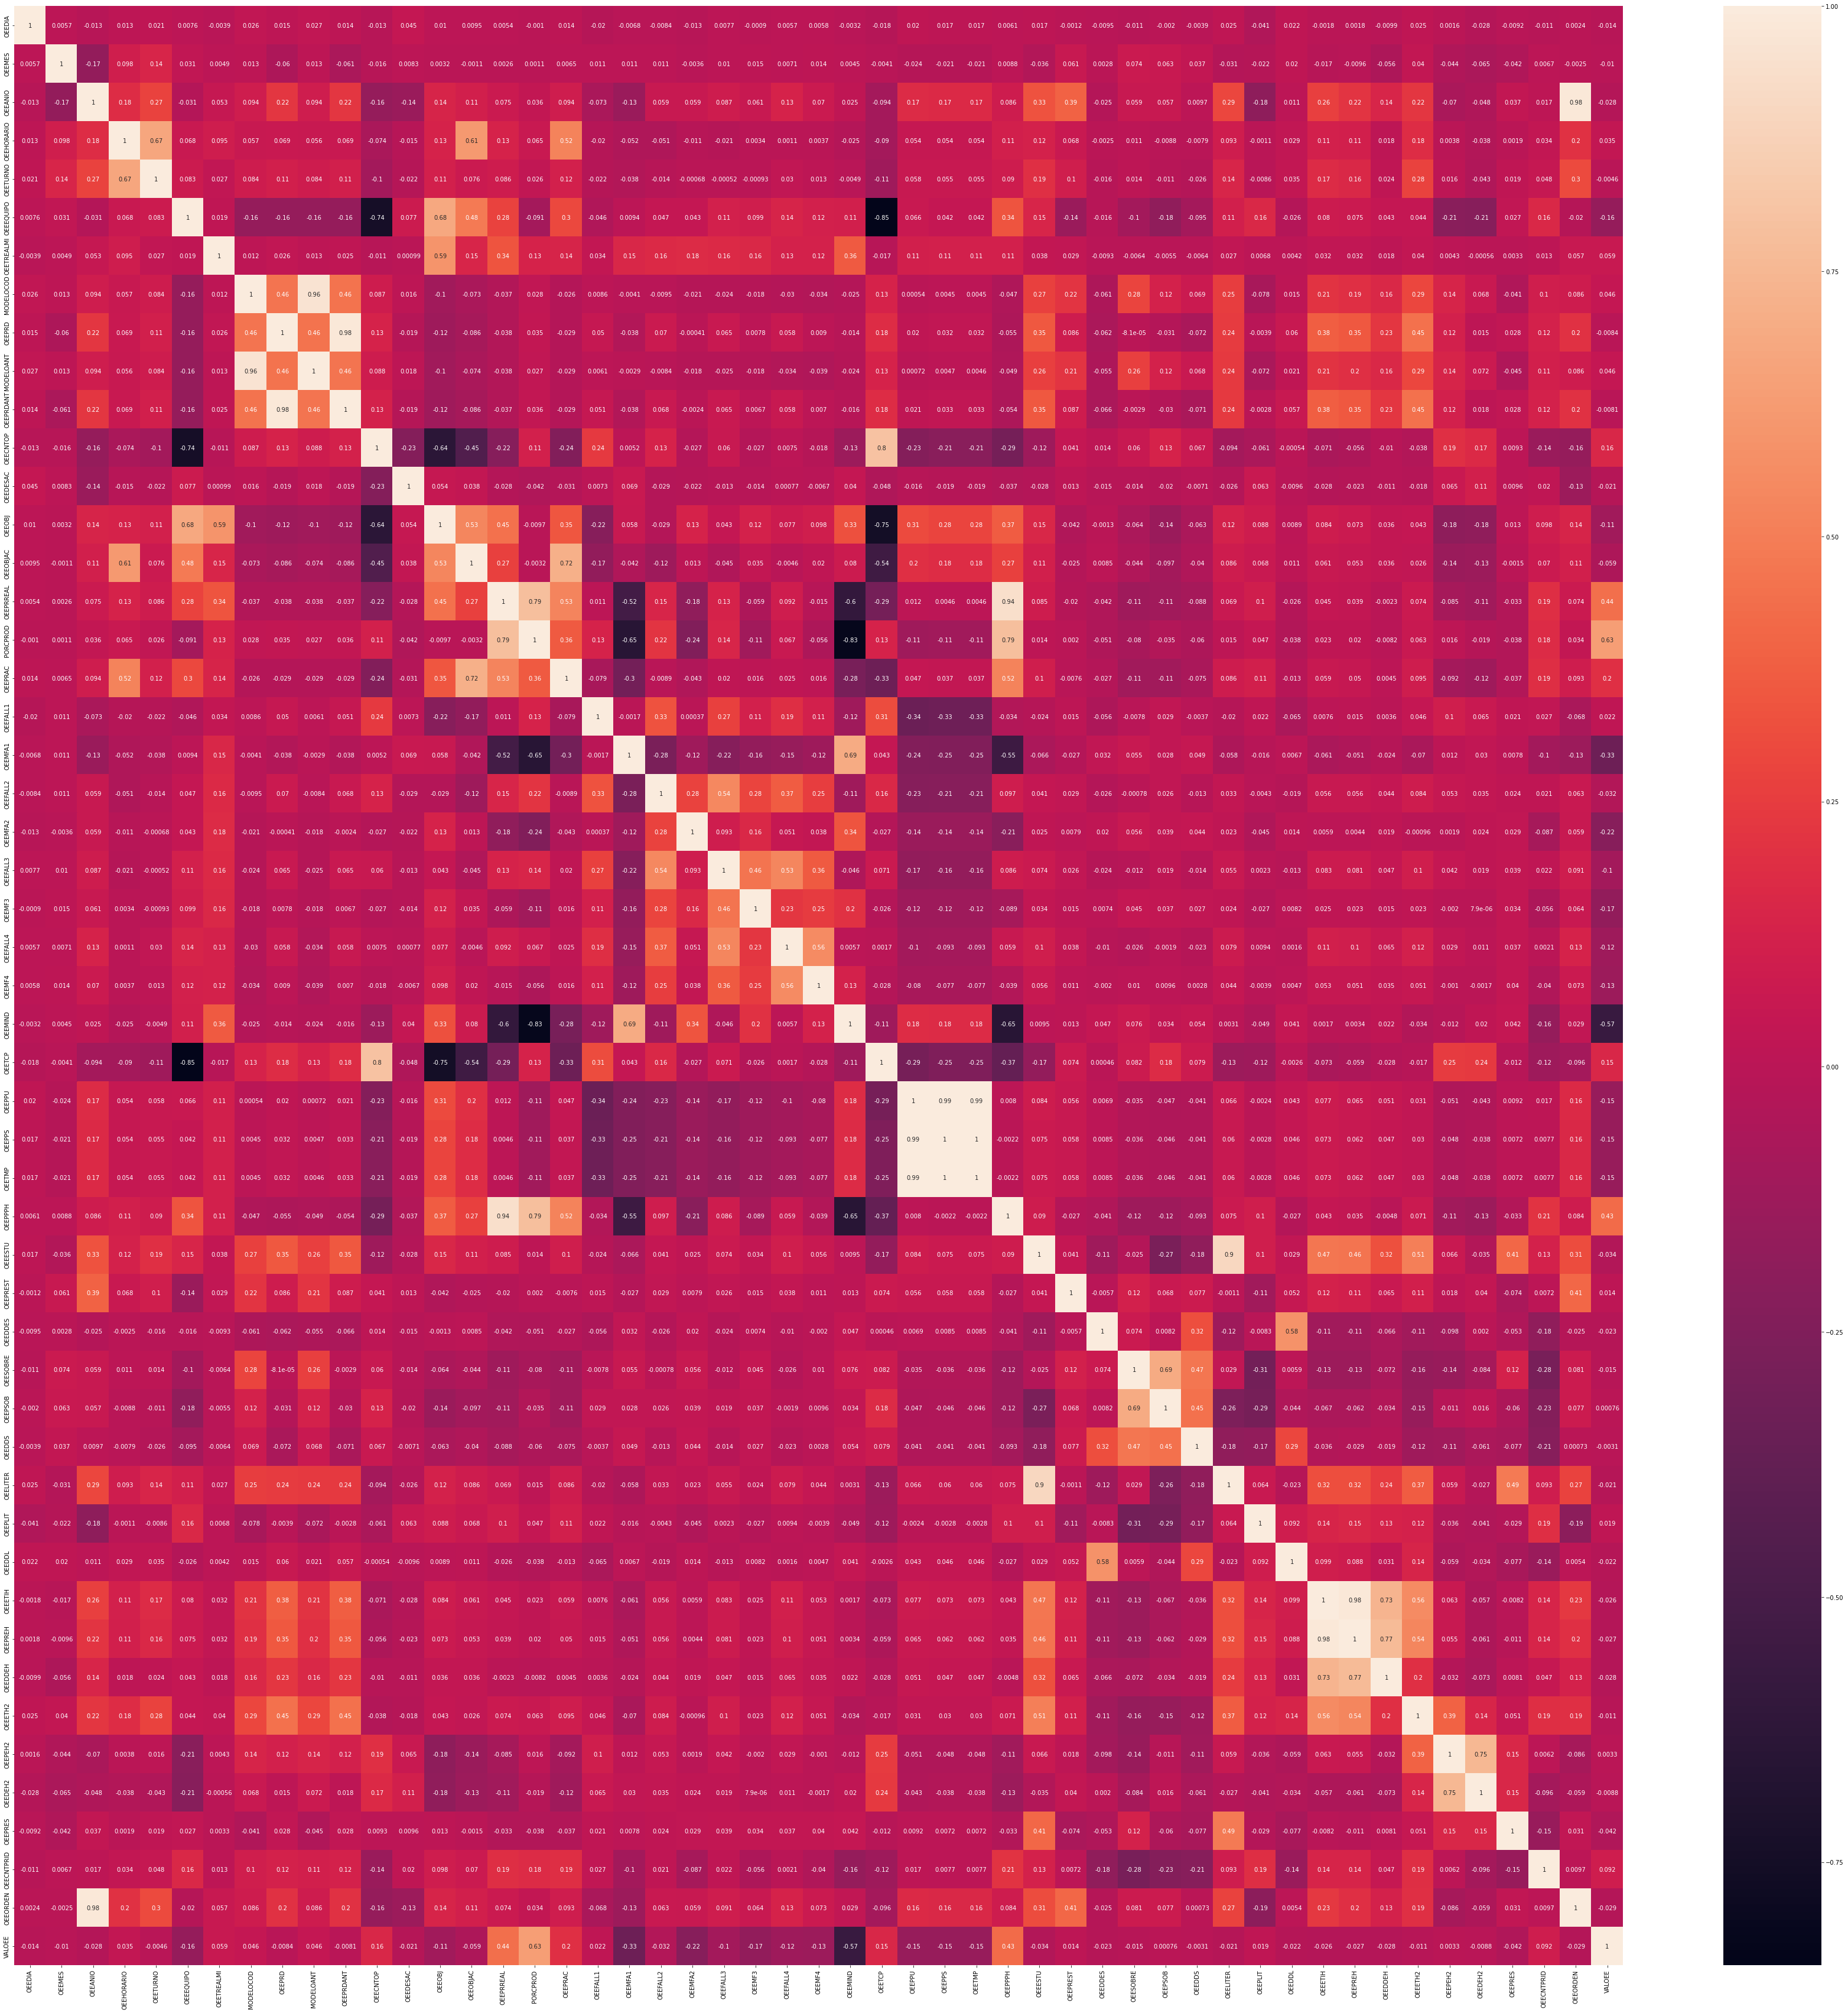

In [ ]:
import seaborn as sns

plt.figure( figsize = (61,61) )
sns.heatmap(correl, annot = True)


In [ ]:
print("SPLIT DATA")
X = np.array(df.drop( ['VALOEE'], 1 ))
y = np.array(df['VALOEE'])

#Preparo test y train
train_size = int(len(df) * 0.67)
test_size = len(df) - train_size

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

print('Train: ',X_train.shape[0],' Test: ',X_test.shape[0])

SPLIT DATA
Train:  14349  Test:  7068


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
feature_names = df.columns
feature_names = feature_names.drop('VALOEE')

In [ ]:
print(feature_names)

Index(['OEEDIA', 'OEEMES', 'OEEANIO', 'OEEHORARIO', 'OEETURNO', 'OEEEQUIPO',
       'OEETREALMI', 'MODELOCOD', 'OEEPRD', 'MODELOANT', 'OEEPRDANT',
       'OEECNTOP', 'OEEDESAC', 'OEEOBJ', 'OEEOBJAC', 'OEEPRREAL', 'PORCPROD',
       'OEEPRAC', 'OEEFALL1', 'OEEMFA1', 'OEEFALL2', 'OEEMFA2', 'OEEFALL3',
       'OEEMF3', 'OEEFALL4', 'OEEMF4', 'OEEMIND', 'OEETCP', 'OEEPPU', 'OEEPPS',
       'OEETMP', 'OEEPPPH', 'OEEESTU', 'OEEPREST', 'OEEDDES', 'OEESOBRE',
       'OEEPSOB', 'OEEDDS', 'OEELITER', 'OEEPLIT', 'OEEDDL', 'OEEETIH',
       'OEEPREH', 'OEEDDEH', 'OEEETH2', 'OEEPEH2', 'OEEDEH2', 'OEEPRES',
       'OEECNTPRID', 'OEEORDEN'],
      dtype='object')


In [ ]:
print('Mutual Info Classif Feature Selection')

importances = mutual_info_classif(X,y)
mic_feat_importances = pd.Series(importances,feature_names)

print(mic_feat_importances.sort_values(ascending=False))

Mutual Info Classif Feature Selection
PORCPROD      0.446608
OEEPPPH       0.360899
OEEMIND       0.350800
OEEPRREAL     0.252792
OEEMFA1       0.138455
OEEFALL1      0.090120
OEEPRAC       0.064999
OEEORDEN      0.061268
OEEMFA2       0.059469
OEEPPS        0.054185
OEETMP        0.049974
OEEPPU        0.046448
MODELOANT     0.044299
OEEESTU       0.043916
OEEMF3        0.039176
OEELITER      0.038918
MODELOCOD     0.038284
OEEPRD        0.038131
OEEPRDANT     0.038051
OEEFALL2      0.037666
OEEOBJAC      0.028555
OEECNTPRID    0.025352
OEEOBJ        0.022966
OEEMF4        0.020123
OEEFALL3      0.019625
OEESOBRE      0.018071
OEEDDEH       0.016165
OEETCP        0.015303
OEEEQUIPO     0.015298
OEEFALL4      0.013913
OEECNTOP      0.012956
OEEDEH2       0.012180
OEEPREST      0.008973
OEEHORARIO    0.008801
OEEDDS        0.007982
OEEDDES       0.005726
OEEETH2       0.005632
OEEDDL        0.005625
OEEMES        0.004892
OEETREALMI    0.004872
OEEPRES       0.003645
OEETURNO      0.002

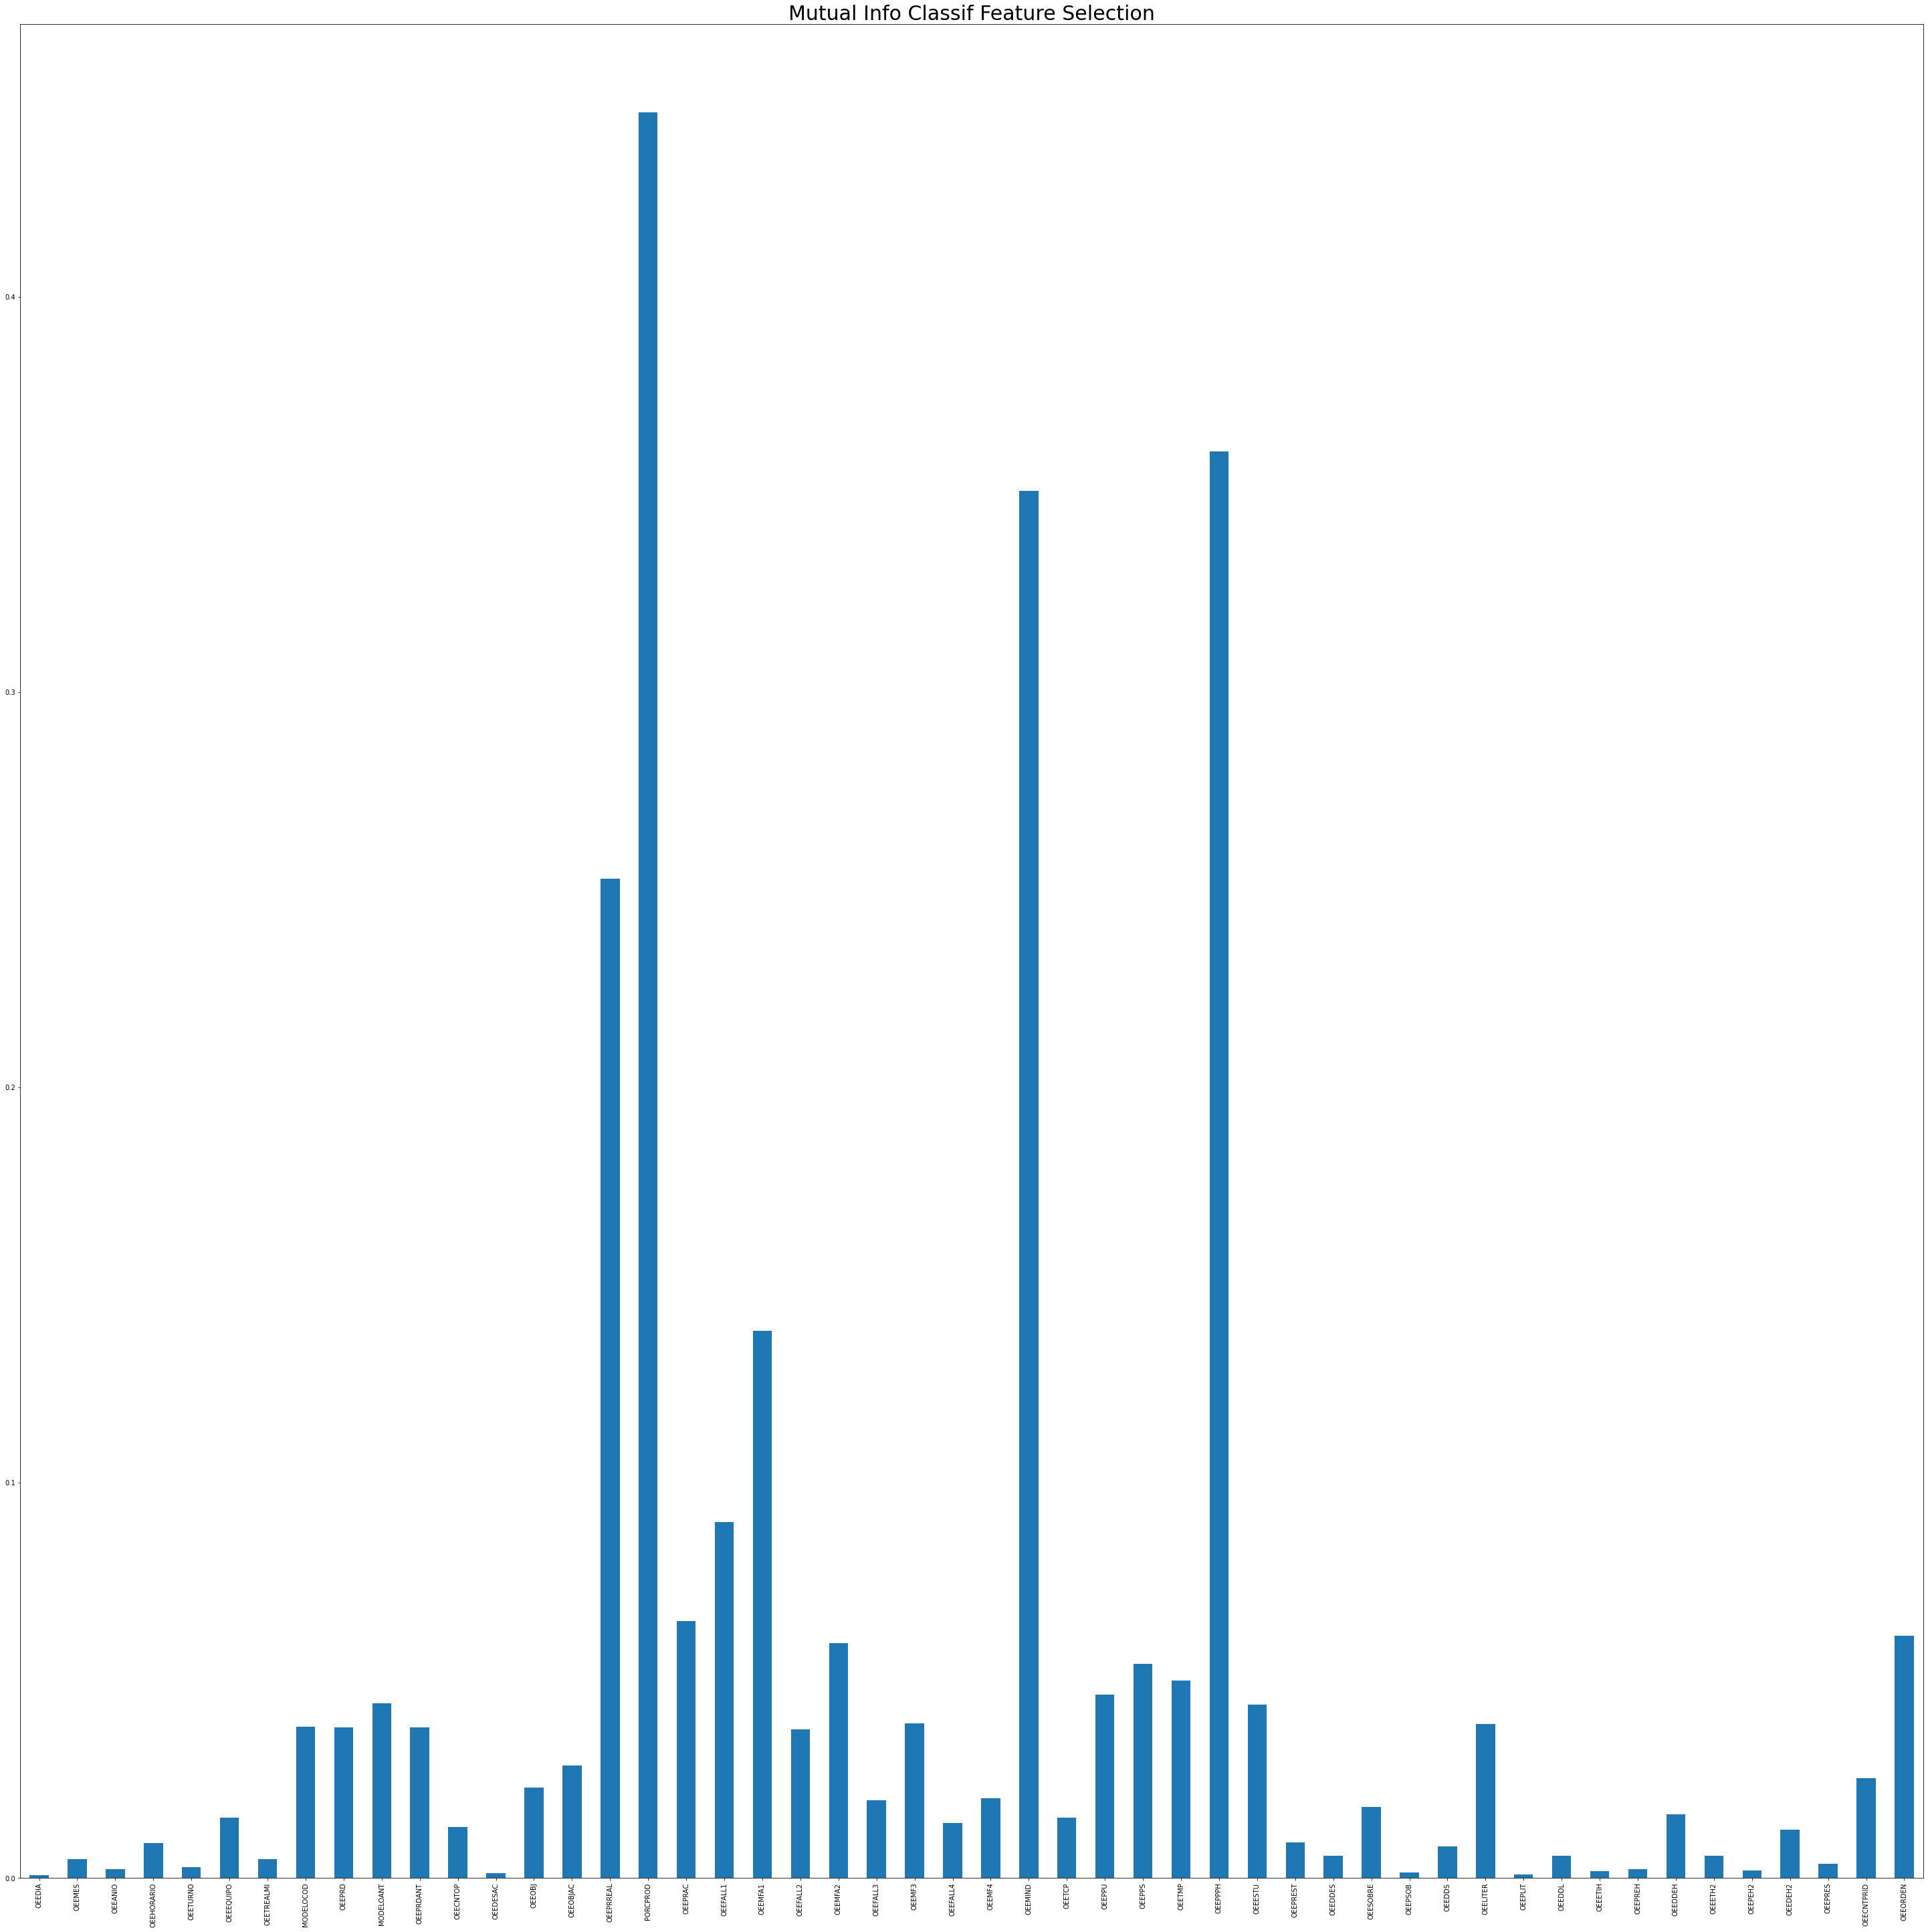

In [ ]:
plt.figure(figsize = (51,51))
plt.title('Mutual Info Classif Feature Selection', size = 30)
mic_feat_importances.plot.bar()
plt.show()

In [ ]:
print('SelectKBest with Chi-square Test Feature_Selection')

chi2_features = SelectKBest(score_func=chi2,k=20)

scaler = MinMaxScaler()
scaler.fit(X)
X_KB= scaler.transform(X)

X_kbest_features = chi2_features.fit_transform(X_KB, y)

#Reduced Features
print("Original feature number: ",X.shape[1])
print("Reduced feature number: ",X_kbest_features.shape[1])

idx = chi2_features.get_support(1)

print('Index: ', idx )

print('Important Features: ',feature_names[idx])

SelectKBest with Chi-square Test Feature_Selection
Original feature number:  50
Reduced feature number:  20
Index:  [ 5 12 14 15 16 17 19 21 22 23 24 25 26 27 28 29 30 31 41 42]
Important Features:  Index(['OEEEQUIPO', 'OEEDESAC', 'OEEOBJAC', 'OEEPRREAL', 'PORCPROD', 'OEEPRAC',
       'OEEMFA1', 'OEEMFA2', 'OEEFALL3', 'OEEMF3', 'OEEFALL4', 'OEEMF4',
       'OEEMIND', 'OEETCP', 'OEEPPU', 'OEEPPS', 'OEETMP', 'OEEPPPH', 'OEEETIH',
       'OEEPREH'],
      dtype='object')


In [ ]:
print('Feature selection is performed using Pearson’s Correlation Coefficient via the f_regression() function')

fr_features = SelectKBest(score_func=f_regression,k=20)

fr_scaler = MinMaxScaler()
fr_scaler.fit(X)
X_KB_fr= fr_scaler.transform(X)

X_kbest_features_fr = fr_features.fit_transform(X_KB_fr, y)

#Reduced Features
print("Original feature number: ",X.shape[1])
print("Reduced feature number: ",X_kbest_features_fr.shape[1])

idx_fr = fr_features.get_support(1)

print('Index: ', idx_fr)

print('Important Features: ',feature_names[idx_fr])

Feature selection is performed using Pearson’s Correlation Coefficient via the f_regression() function
Original feature number:  50
Reduced feature number:  20
Index:  [ 5  6 11 13 15 16 17 19 21 22 23 24 25 26 27 28 29 30 31 48]
Important Features:  Index(['OEEEQUIPO', 'OEETREALMI', 'OEECNTOP', 'OEEOBJ', 'OEEPRREAL',
       'PORCPROD', 'OEEPRAC', 'OEEMFA1', 'OEEMFA2', 'OEEFALL3', 'OEEMF3',
       'OEEFALL4', 'OEEMF4', 'OEEMIND', 'OEETCP', 'OEEPPU', 'OEEPPS', 'OEETMP',
       'OEEPPPH', 'OEECNTPRID'],
      dtype='object')


In [ ]:
print('Feature selection is performed using ANOVA F measure via the f_classif() function')

fs_f_classif = SelectKBest(score_func=f_classif, k=20)
# apply feature selection
X_selected_f_clasiff = fs_f_classif.fit_transform(X, y)
print(X_selected_f_clasiff.shape)

...
# what are scores for the features
for i in range(len(fs_f_classif.scores_)):
	print('Feature %d: %f' % (i, fs_f_classif.scores_[i]))

Feature selection is performed using ANOVA F measure via the f_classif() function
(21417, 20)
Feature 0: 4.276339
Feature 1: 2.181960
Feature 2: 17.065188
Feature 3: 25.849339
Feature 4: 0.462061
Feature 5: 545.704485
Feature 6: 75.938743
Feature 7: 46.332167
Feature 8: 1.516800
Feature 9: 46.360229
Feature 10: 1.422044
Feature 11: 529.635330
Feature 12: 9.210311
Feature 13: 254.646615
Feature 14: 75.674663
Feature 15: 5199.718554
Feature 16: 14413.130004
Feature 17: 869.387560
Feature 18: 10.658128
Feature 19: 2666.909433
Feature 20: 22.536378
Feature 21: 1043.090207
Feature 22: 223.266304
Feature 23: 675.441094
Feature 24: 329.973148
Feature 25: 347.308345
Feature 26: 10463.015843
Feature 27: 524.170174
Feature 28: 480.992321
Feature 29: 494.887923
Feature 30: 494.887033
Feature 31: 4787.933463
Feature 32: 24.828081
Feature 33: 3.939000
Feature 34: 11.017463
Feature 35: 4.690091
Feature 36: 0.012504
Feature 37: 0.211673
Feature 38: 9.734204
Feature 39: 7.473061
Feature 40: 9.929720
F

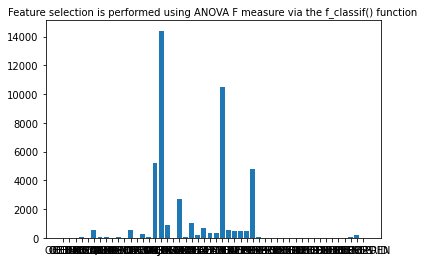

<Figure size 3672x3672 with 0 Axes>

In [ ]:
# plot the scores
pyplot.bar(feature_names, fs_f_classif.scores_)
pyplot.title('Feature selection is performed using ANOVA F measure via the f_classif() function',size=10)
pyplot.figure(figsize=(51,51))
pyplot.show()

In [ ]:
fs_f_classif_scores = pd.Series(fs_f_classif.scores_, index=feature_names)
print(fs_f_classif_scores.sort_values(ascending=False))

PORCPROD      14413.130004
OEEMIND       10463.015843
OEEPRREAL      5199.718554
OEEPPPH        4787.933463
OEEMFA1        2666.909433
OEEMFA2        1043.090207
OEEPRAC         869.387560
OEEMF3          675.441094
OEEEQUIPO       545.704485
OEECNTOP        529.635330
OEETCP          524.170174
OEEPPS          494.887923
OEETMP          494.887033
OEEPPU          480.992321
OEEMF4          347.308345
OEEFALL4        329.973148
OEEOBJ          254.646615
OEEFALL3        223.266304
OEECNTPRID      182.497905
OEETREALMI       75.938743
OEEOBJAC         75.674663
MODELOANT        46.360229
MODELOCOD        46.332167
OEEPRES          38.722310
OEEHORARIO       25.849339
OEEESTU          24.828081
OEEFALL2         22.536378
OEEORDEN         18.405009
OEEANIO          17.065188
OEEDDEH          16.976563
OEEPREH          15.788912
OEEETIH          14.328595
OEEDDES          11.017463
OEEFALL1         10.658128
OEEDDL            9.929720
OEELITER          9.734204
OEEDESAC          9.210311
O

Decision Tree Classifier Feature Importance
Model accuracy score with criterion entropy: 0.9996


[Text(0.7, 0.9444444444444444, 'X[16] <= 8.5\nentropy = 0.664\nsamples = 14349\nvalue = [11869, 2480]'),
 Text(0.6, 0.8333333333333334, 'X[26] <= 3.038\nentropy = 0.036\nsamples = 11914\nvalue = [11869, 45]'),
 Text(0.4, 0.7222222222222222, 'X[19] <= 8.0\nentropy = 1.0\nsamples = 59\nvalue = [29, 30]'),
 Text(0.3, 0.6111111111111112, 'X[5] <= 1.5\nentropy = 0.811\nsamples = 40\nvalue = [10, 30]'),
 Text(0.2, 0.5, 'X[20] <= 64.0\nentropy = 0.337\nsamples = 32\nvalue = [2, 30]'),
 Text(0.1, 0.3888888888888889, 'entropy = 0.0\nsamples = 28\nvalue = [0, 28]'),
 Text(0.3, 0.3888888888888889, 'X[20] <= 70.0\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.2, 0.2777777777777778, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4, 0.2777777777777778, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4, 0.5, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.5, 0.6111111111111112, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.8, 0.7222222222222222, 'X[26] <= 12.0

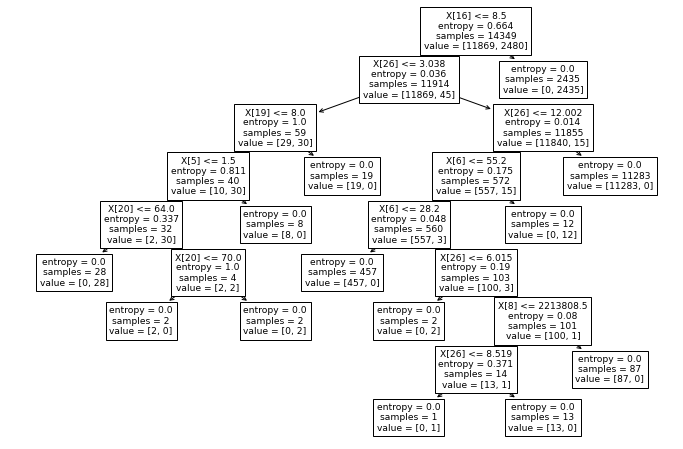

In [ ]:
print('Decision Tree Classifier Feature Importance')

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
clf_en.fit(X_train, y_train)
y_pred_en = clf_en.predict(X_test)

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en
plt.figure(figsize=(12,8))

tree.plot_tree(clf_en.fit(X_train, y_train))

In [ ]:
clf_en_importance = clf_en.feature_importances_

# summarize feature importance
for i,v in enumerate(clf_en_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00227
Feature: 6, Score: 0.00846
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00030
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.95520
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00278
Feature: 20, Score: 0.00113
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.02986
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

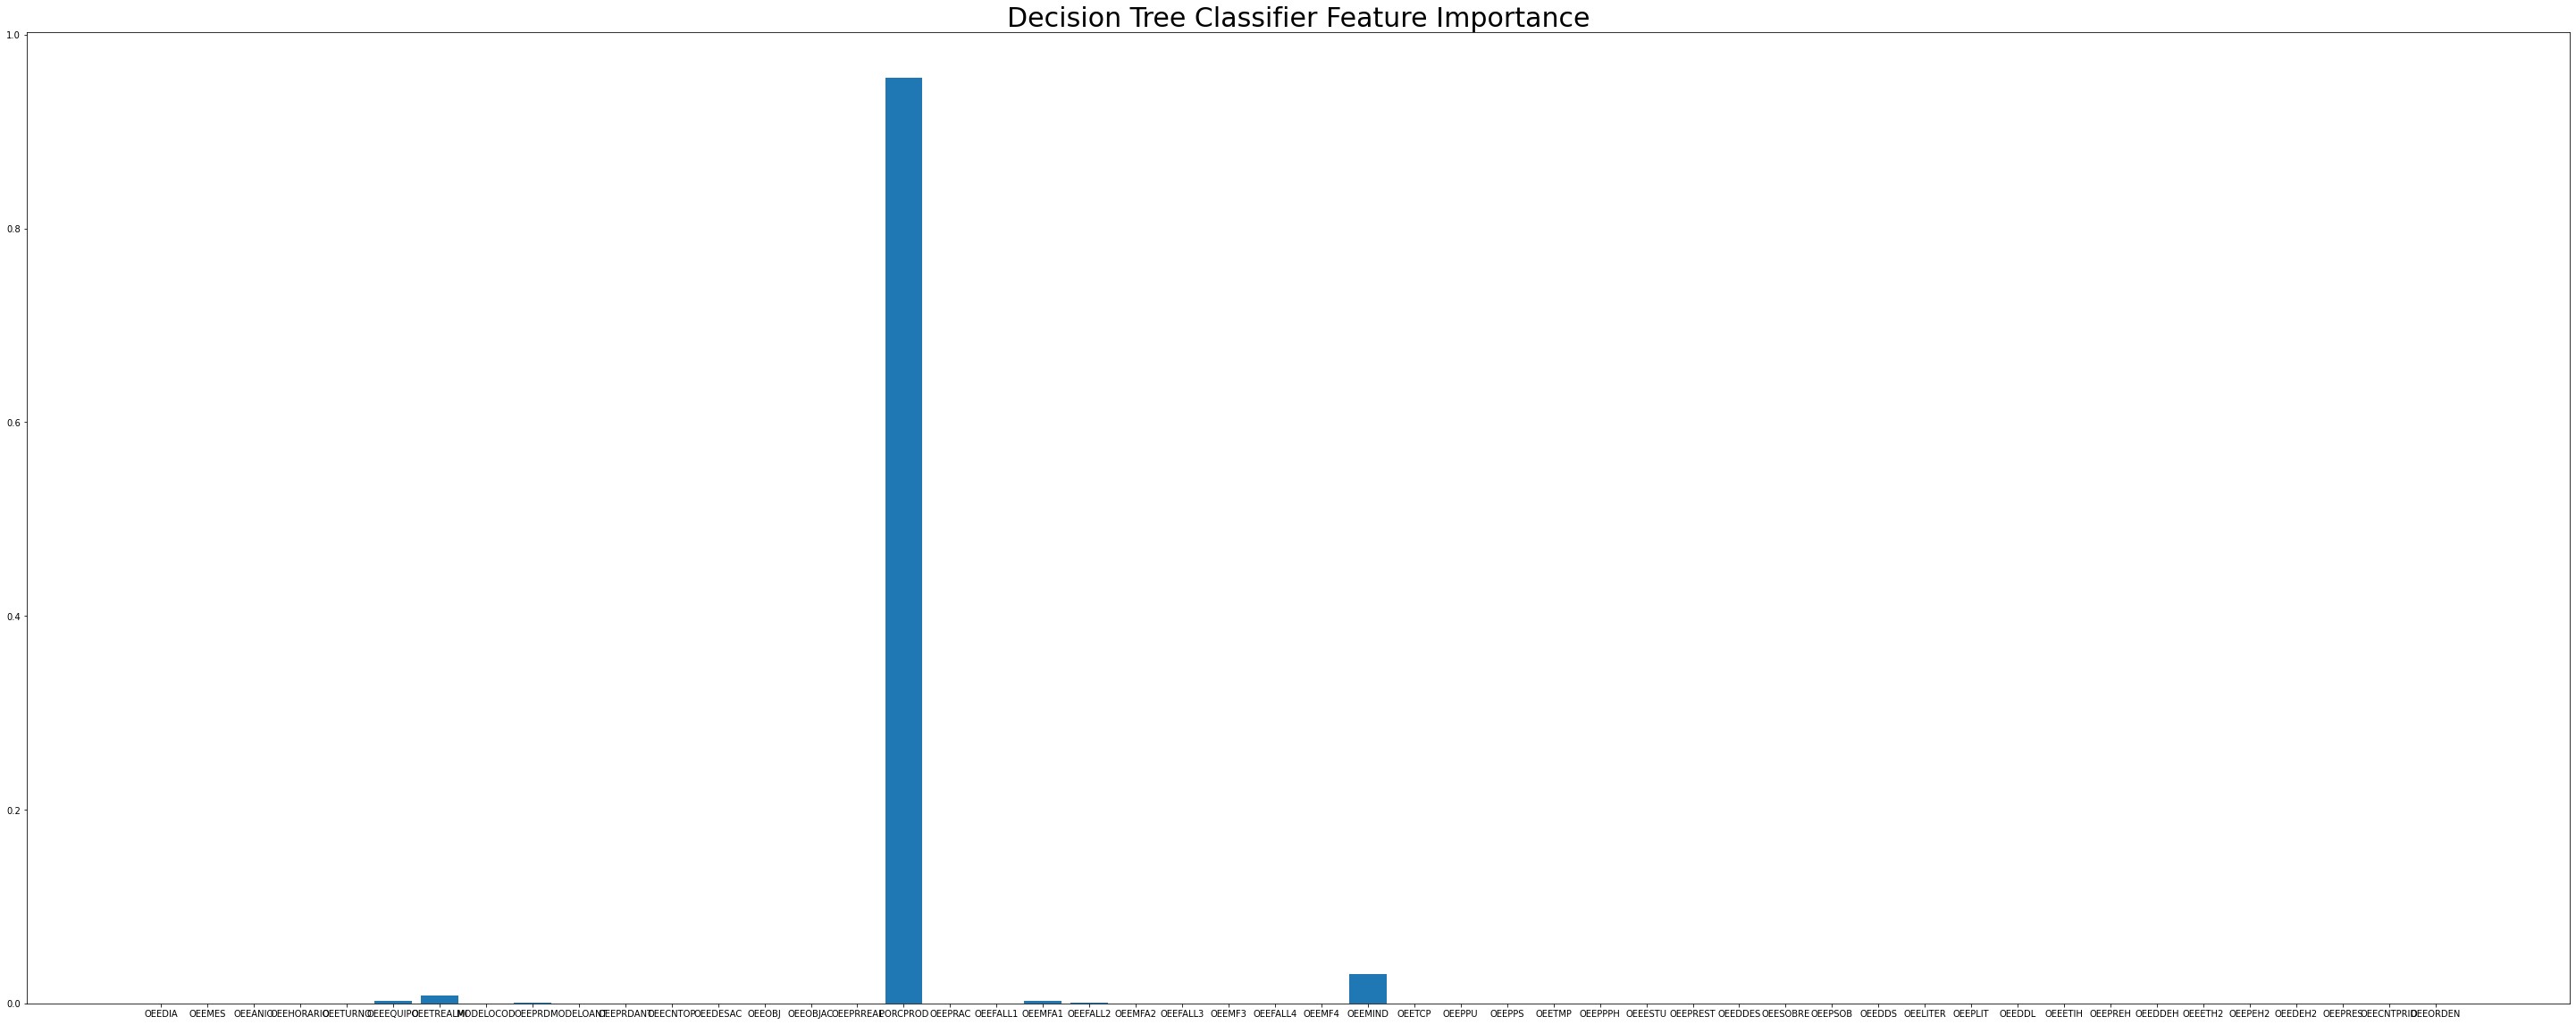

In [ ]:
# plot feature importance
pyplot.figure(figsize = (51,20))
pyplot.title('Decision Tree Classifier Feature Importance',size = 30)
pyplot.bar(feature_names, clf_en_importance) #pyplot.bar([x for x in range(len(clf_en_importance))], clf_en_importance)
pyplot.show()

In [ ]:
clf_en__importances = pd.Series(clf_en_importance, index=feature_names)
print(clf_en__importances.sort_values(ascending=False))

PORCPROD      0.955195
OEEMIND       0.029855
OEETREALMI    0.008456
OEEMFA1       0.002785
OEEEQUIPO     0.002273
OEEFALL2      0.001133
OEEPRD        0.000304
OEEDIA        0.000000
OEEPPPH       0.000000
OEEESTU       0.000000
OEEPREST      0.000000
OEEDDES       0.000000
OEESOBRE      0.000000
OEEPSOB       0.000000
OEEDDS        0.000000
OEEPLIT       0.000000
OEELITER      0.000000
OEEPPS        0.000000
OEEDDL        0.000000
OEEETIH       0.000000
OEEPREH       0.000000
OEEDDEH       0.000000
OEEETH2       0.000000
OEEPEH2       0.000000
OEEDEH2       0.000000
OEEPRES       0.000000
OEECNTPRID    0.000000
OEETMP        0.000000
OEEMF4        0.000000
OEEPPU        0.000000
OEEOBJ        0.000000
OEEANIO       0.000000
OEEHORARIO    0.000000
OEETURNO      0.000000
MODELOCOD     0.000000
MODELOANT     0.000000
OEEPRDANT     0.000000
OEECNTOP      0.000000
OEEDESAC      0.000000
OEEOBJAC      0.000000
OEETCP        0.000000
OEEPRREAL     0.000000
OEEPRAC       0.000000
OEEFALL1   

In [ ]:
print('DecisionTreeRegressor Feature Importances')
# define the model
dtr_model = DecisionTreeRegressor()
# fit the model
dtr_model.fit(X_train, y_train)
# get importance
dtr_importance = dtr_model.feature_importances_
# summarize feature importance
for i,v in enumerate(dtr_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


DecisionTreeRegressor Feature Importances
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00567
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00743
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.97815
Feature: 17, Score: 0.00047
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00452
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00044
Feature: 22, Score: 0.00047
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00070
Feature: 27, Score: 0.00143
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00037
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00024
Feature: 33, Score: 0.00000
Feature: 34, Sco

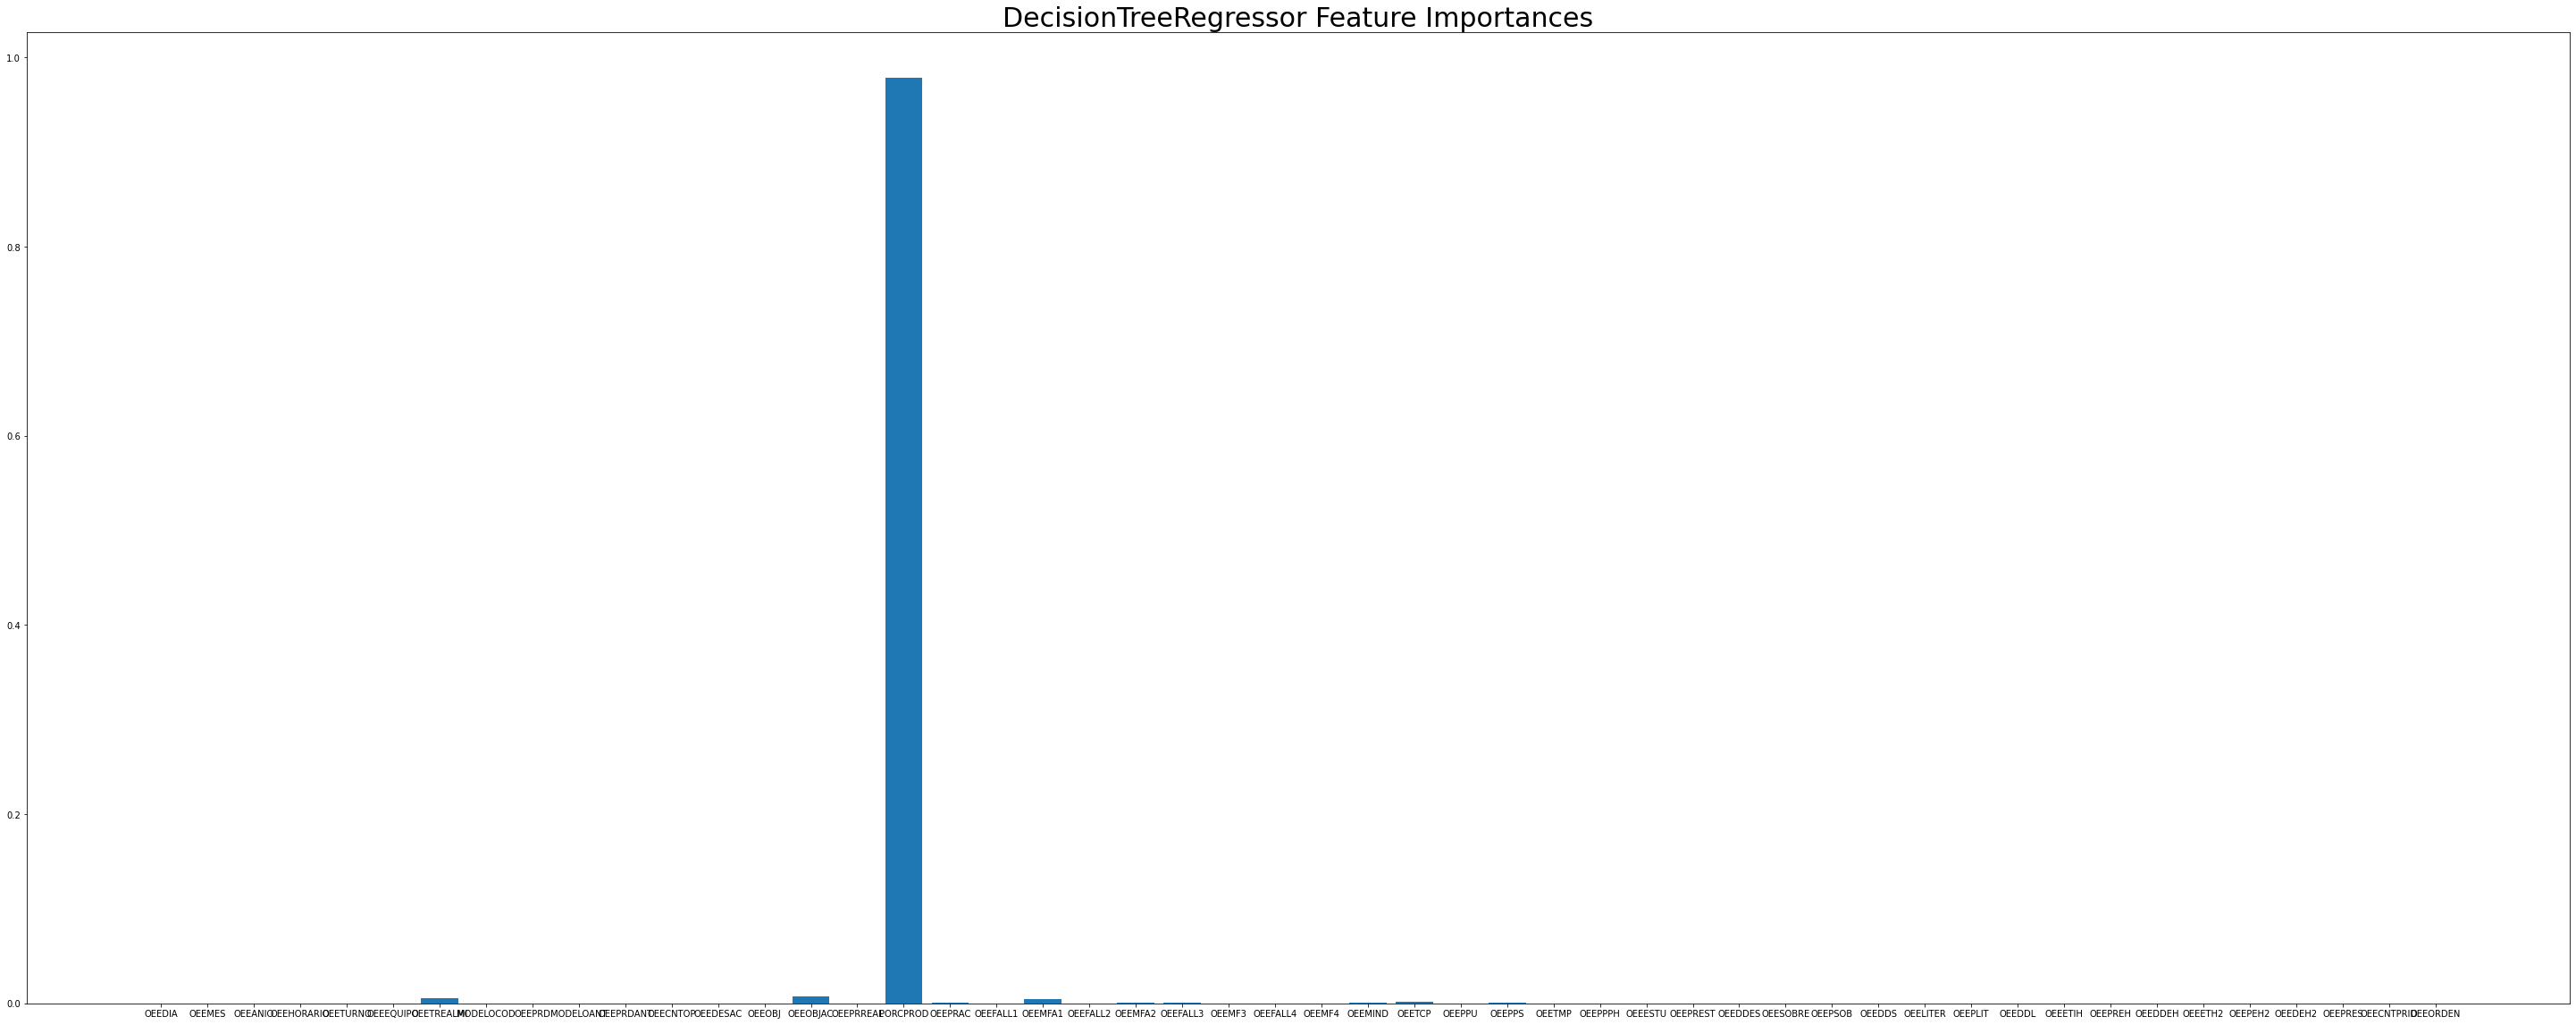

In [ ]:
# plot feature importance
pyplot.figure(figsize=(51,20))
pyplot.title('DecisionTreeRegressor Feature Importances',size = 30)
pyplot.bar(feature_names, dtr_importance)
pyplot.show()

In [ ]:
dtr_importances = pd.Series(dtr_importance, index=feature_names)
print(dtr_importances.sort_values(ascending=False))

PORCPROD      0.978146
OEEOBJAC      0.007434
OEETREALMI    0.005666
OEEMFA1       0.004523
OEETCP        0.001430
OEEMIND       0.000697
OEEPRAC       0.000474
OEEFALL3      0.000469
OEEMFA2       0.000436
OEEPPS        0.000366
OEEESTU       0.000239
OEEORDEN      0.000119
OEEPLIT       0.000000
OEELITER      0.000000
OEEPPPH       0.000000
OEECNTPRID    0.000000
OEEPRES       0.000000
OEEDEH2       0.000000
OEEPREST      0.000000
OEEDDES       0.000000
OEEPEH2       0.000000
OEEETH2       0.000000
OEESOBRE      0.000000
OEEDDEH       0.000000
OEEPSOB       0.000000
OEEPREH       0.000000
OEEETIH       0.000000
OEETMP        0.000000
OEEDDL        0.000000
OEEDDS        0.000000
OEEDIA        0.000000
OEEPPU        0.000000
OEEPRDANT     0.000000
OEEANIO       0.000000
OEEHORARIO    0.000000
OEETURNO      0.000000
OEEEQUIPO     0.000000
MODELOCOD     0.000000
OEEPRD        0.000000
MODELOANT     0.000000
OEECNTOP      0.000000
OEEMES        0.000000
OEEDESAC      0.000000
OEEOBJ     

RandomForestClassifier Feature Importance
Elapsed time to compute the importances: 0.022 seconds


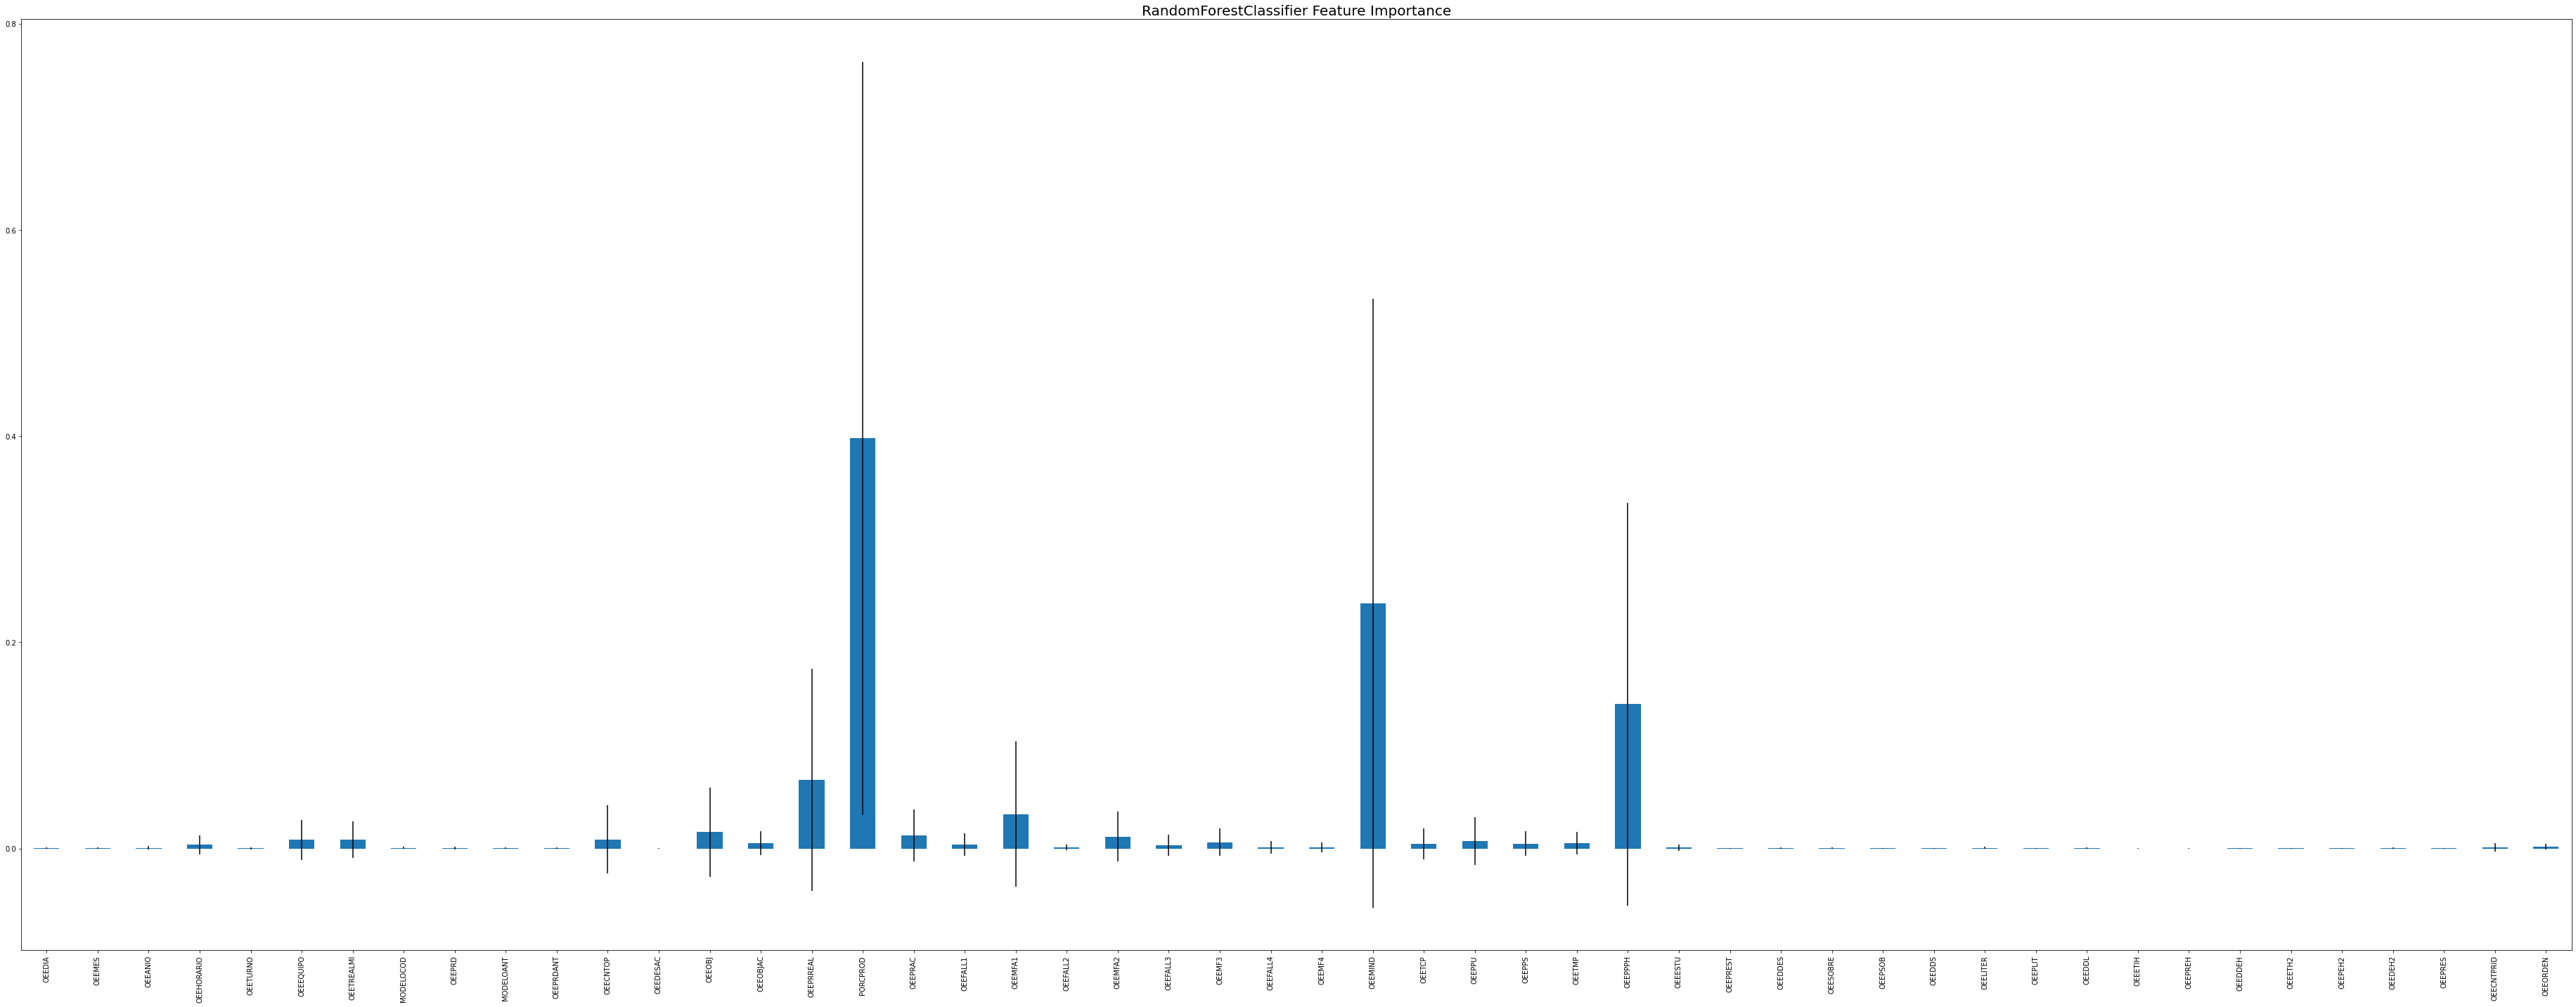

In [ ]:
print('RandomForestClassifier Feature Importance')
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(51, 20))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("RandomForestClassifier Feature Importance",size=20)
fig.tight_layout()

In [ ]:
print(forest_importances.sort_values(ascending=False))

PORCPROD      0.397916
OEEMIND       0.237778
OEEPPPH       0.139889
OEEPRREAL     0.066725
OEEMFA1       0.033436
OEEOBJ        0.015825
OEEPRAC       0.012943
OEEMFA2       0.011525
OEECNTOP      0.008907
OEETREALMI    0.008517
OEEEQUIPO     0.008285
OEEPPU        0.007297
OEEMF3        0.006048
OEETMP        0.005149
OEEOBJAC      0.005071
OEEPPS        0.004804
OEETCP        0.004640
OEEFALL1      0.003903
OEEHORARIO    0.003540
OEEFALL3      0.003152
OEEORDEN      0.001720
OEECNTPRID    0.001230
OEEFALL4      0.001228
OEEMF4        0.001171
OEEFALL2      0.001000
OEEESTU       0.000877
OEELITER      0.000740
OEEANIO       0.000716
OEEDDES       0.000609
MODELOCOD     0.000519
OEEDIA        0.000509
OEEPRD        0.000502
OEEMES        0.000497
MODELOANT     0.000476
OEEDDL        0.000471
OEEPRDANT     0.000421
OEESOBRE      0.000272
OEEDEH2       0.000251
OEETURNO      0.000240
OEEDDS        0.000183
OEEPLIT       0.000181
OEEPRES       0.000162
OEEDDEH       0.000140
OEEPEH2    

Feature importance based on feature permutation
Elapsed time to compute the importances: 80.926 seconds


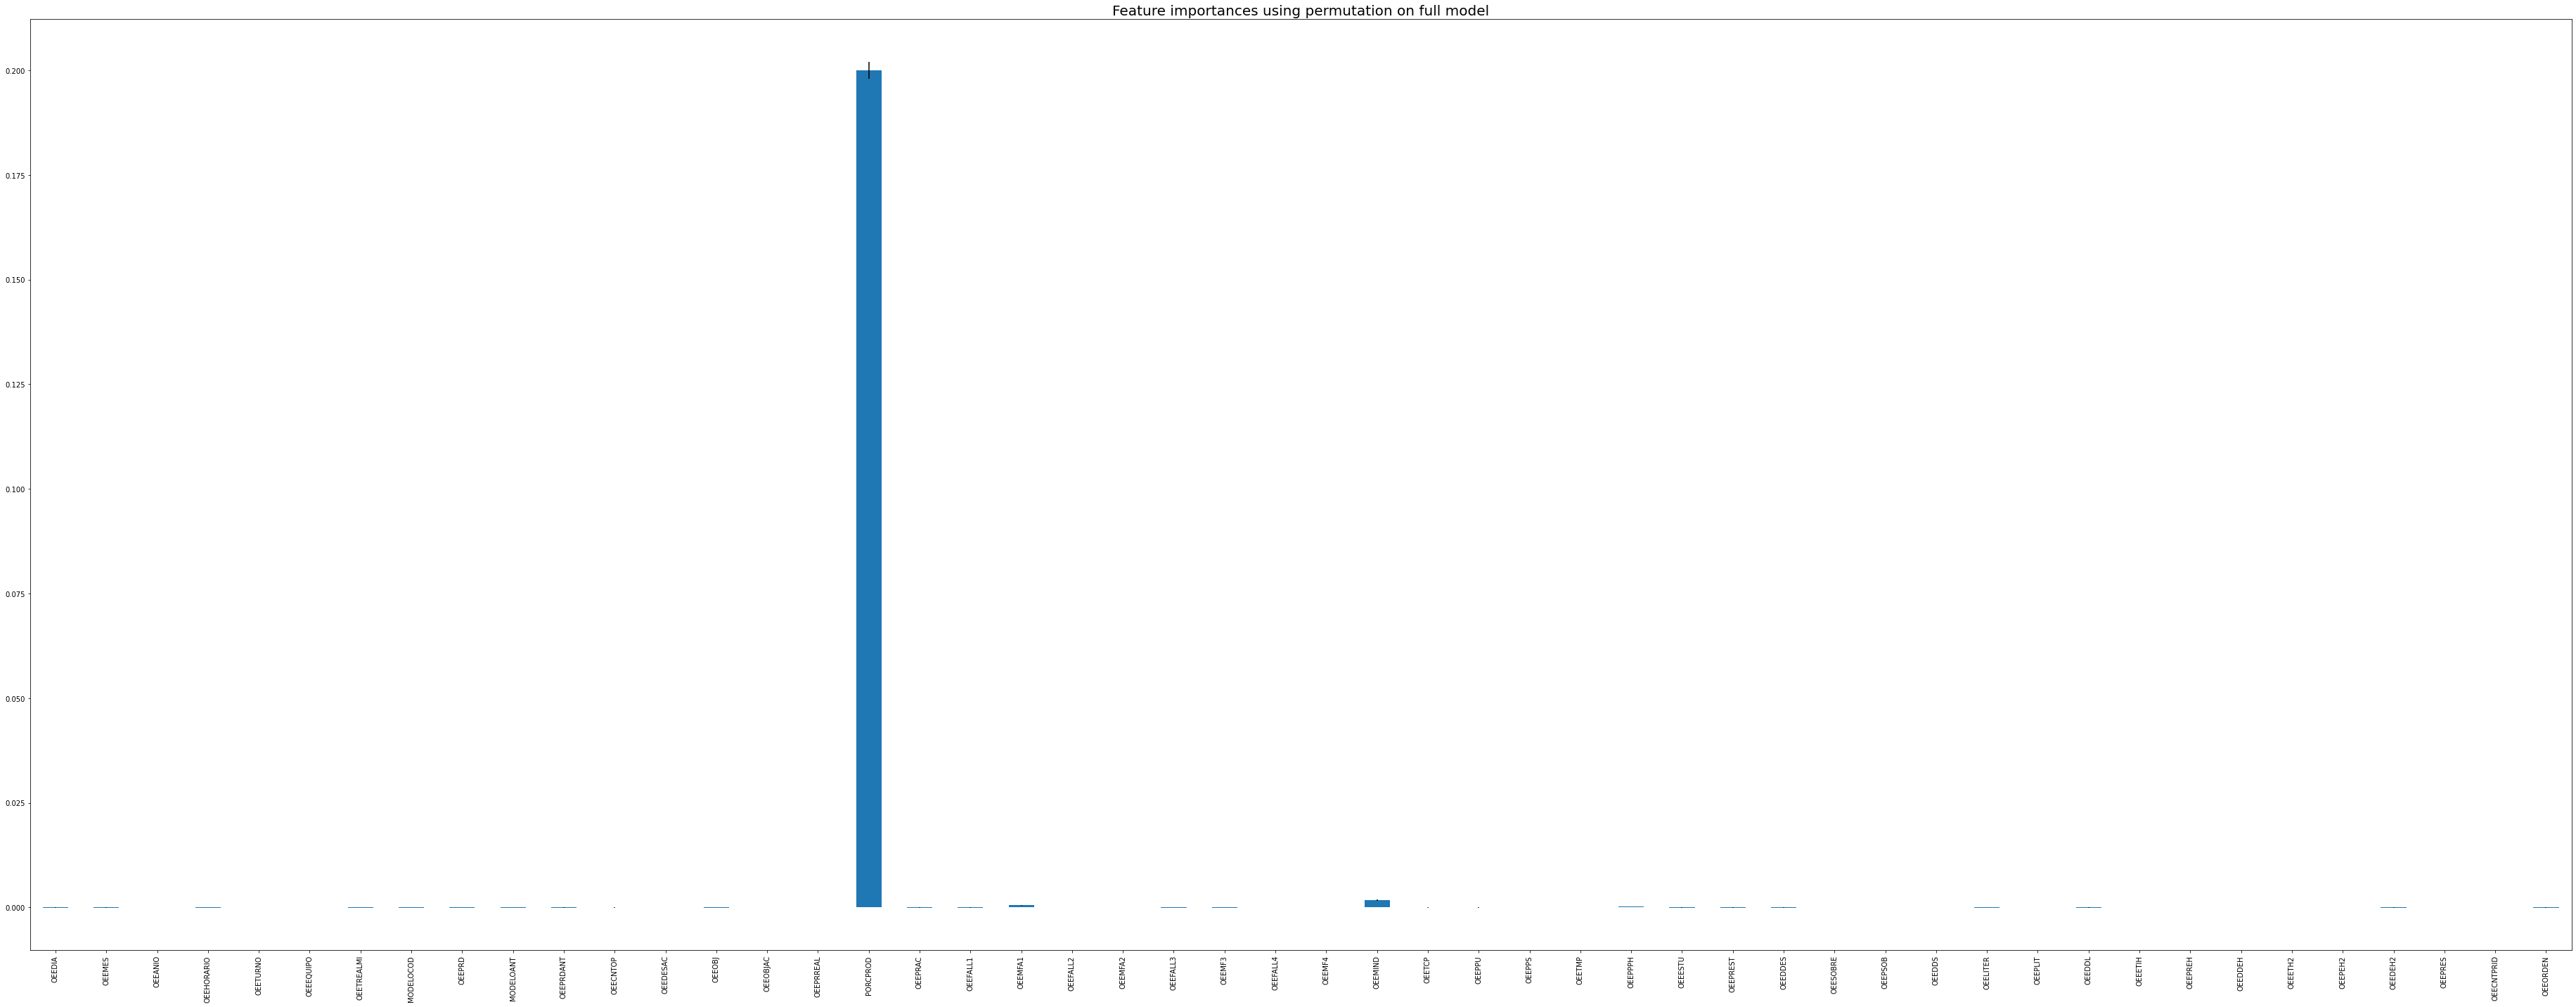

In [ ]:
print('Feature importance based on feature permutation')

start_time = time.time()
result = permutation_importance(
    forest, X, y, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots(figsize=(51, 20))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model",size=20)
fig.tight_layout()
plt.show()

In [ ]:
print(forest_importances.sort_values(ascending=False))

PORCPROD      0.200028
OEEMIND       0.001807
OEEMFA1       0.000551
OEEPPPH       0.000224
OEEEQUIPO     0.000112
OEEPRREAL     0.000093
OEEOBJAC      0.000047
OEEMFA2       0.000042
OEETCP        0.000019
OEECNTOP      0.000014
OEEPPU        0.000009
OEEPLIT       0.000000
OEEMF4        0.000000
OEEFALL4      0.000000
OEEPPS        0.000000
OEETMP        0.000000
OEEDDS        0.000000
OEEFALL2      0.000000
OEEETIH       0.000000
OEEPSOB       0.000000
OEEETH2       0.000000
OEEANIO       0.000000
OEECNTPRID    0.000000
OEETURNO      0.000000
OEEPRES       0.000000
OEEPREH       0.000000
OEEPEH2       0.000000
OEEDESAC      0.000000
OEEDDEH       0.000000
OEESOBRE      0.000000
OEEDEH2      -0.000005
OEEDDL       -0.000005
OEEPREST     -0.000005
OEEPRDANT    -0.000009
OEEMES       -0.000014
OEEDDES      -0.000014
OEEDIA       -0.000019
OEEFALL1     -0.000019
OEEPRAC      -0.000019
OEEORDEN     -0.000019
OEEESTU      -0.000023
MODELOANT    -0.000028
OEEPRD       -0.000028
OEEMF3     

In [ ]:
print('Feature Importance Linear Regression')
lr_model = LinearRegression()
# fit the model
lr_model.fit(X_train, y_train)
# get importance
lr_importance = lr_model.coef_
# summarize feature importance
for i,v in enumerate(lr_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Feature Importance Linear Regression
Feature: 0, Score: -0.00055
Feature: 1, Score: -0.00249
Feature: 2, Score: -0.01137
Feature: 3, Score: -0.00030
Feature: 4, Score: 0.00080
Feature: 5, Score: 0.07448
Feature: 6, Score: 0.01290
Feature: 7, Score: -0.00003
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00010
Feature: 10, Score: -0.00000
Feature: 11, Score: 0.03584
Feature: 12, Score: 0.04613
Feature: 13, Score: 0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: -0.00005
Feature: 16, Score: 0.02996
Feature: 17, Score: 0.00000
Feature: 18, Score: -0.00082
Feature: 19, Score: -0.01202
Feature: 20, Score: -0.00127
Feature: 21, Score: -0.01275
Feature: 22, Score: -0.00143
Feature: 23, Score: -0.01225
Feature: 24, Score: -0.00131
Feature: 25, Score: -0.00958
Feature: 26, Score: -0.00245
Feature: 27, Score: 0.17552
Feature: 28, Score: 0.00005
Feature: 29, Score: 0.35166
Feature: 30, Score: -21.12807
Feature: 31, Score: 0.00008
Feature: 32, Score: -0.00001
Feature: 33, Score: 0.00001
F

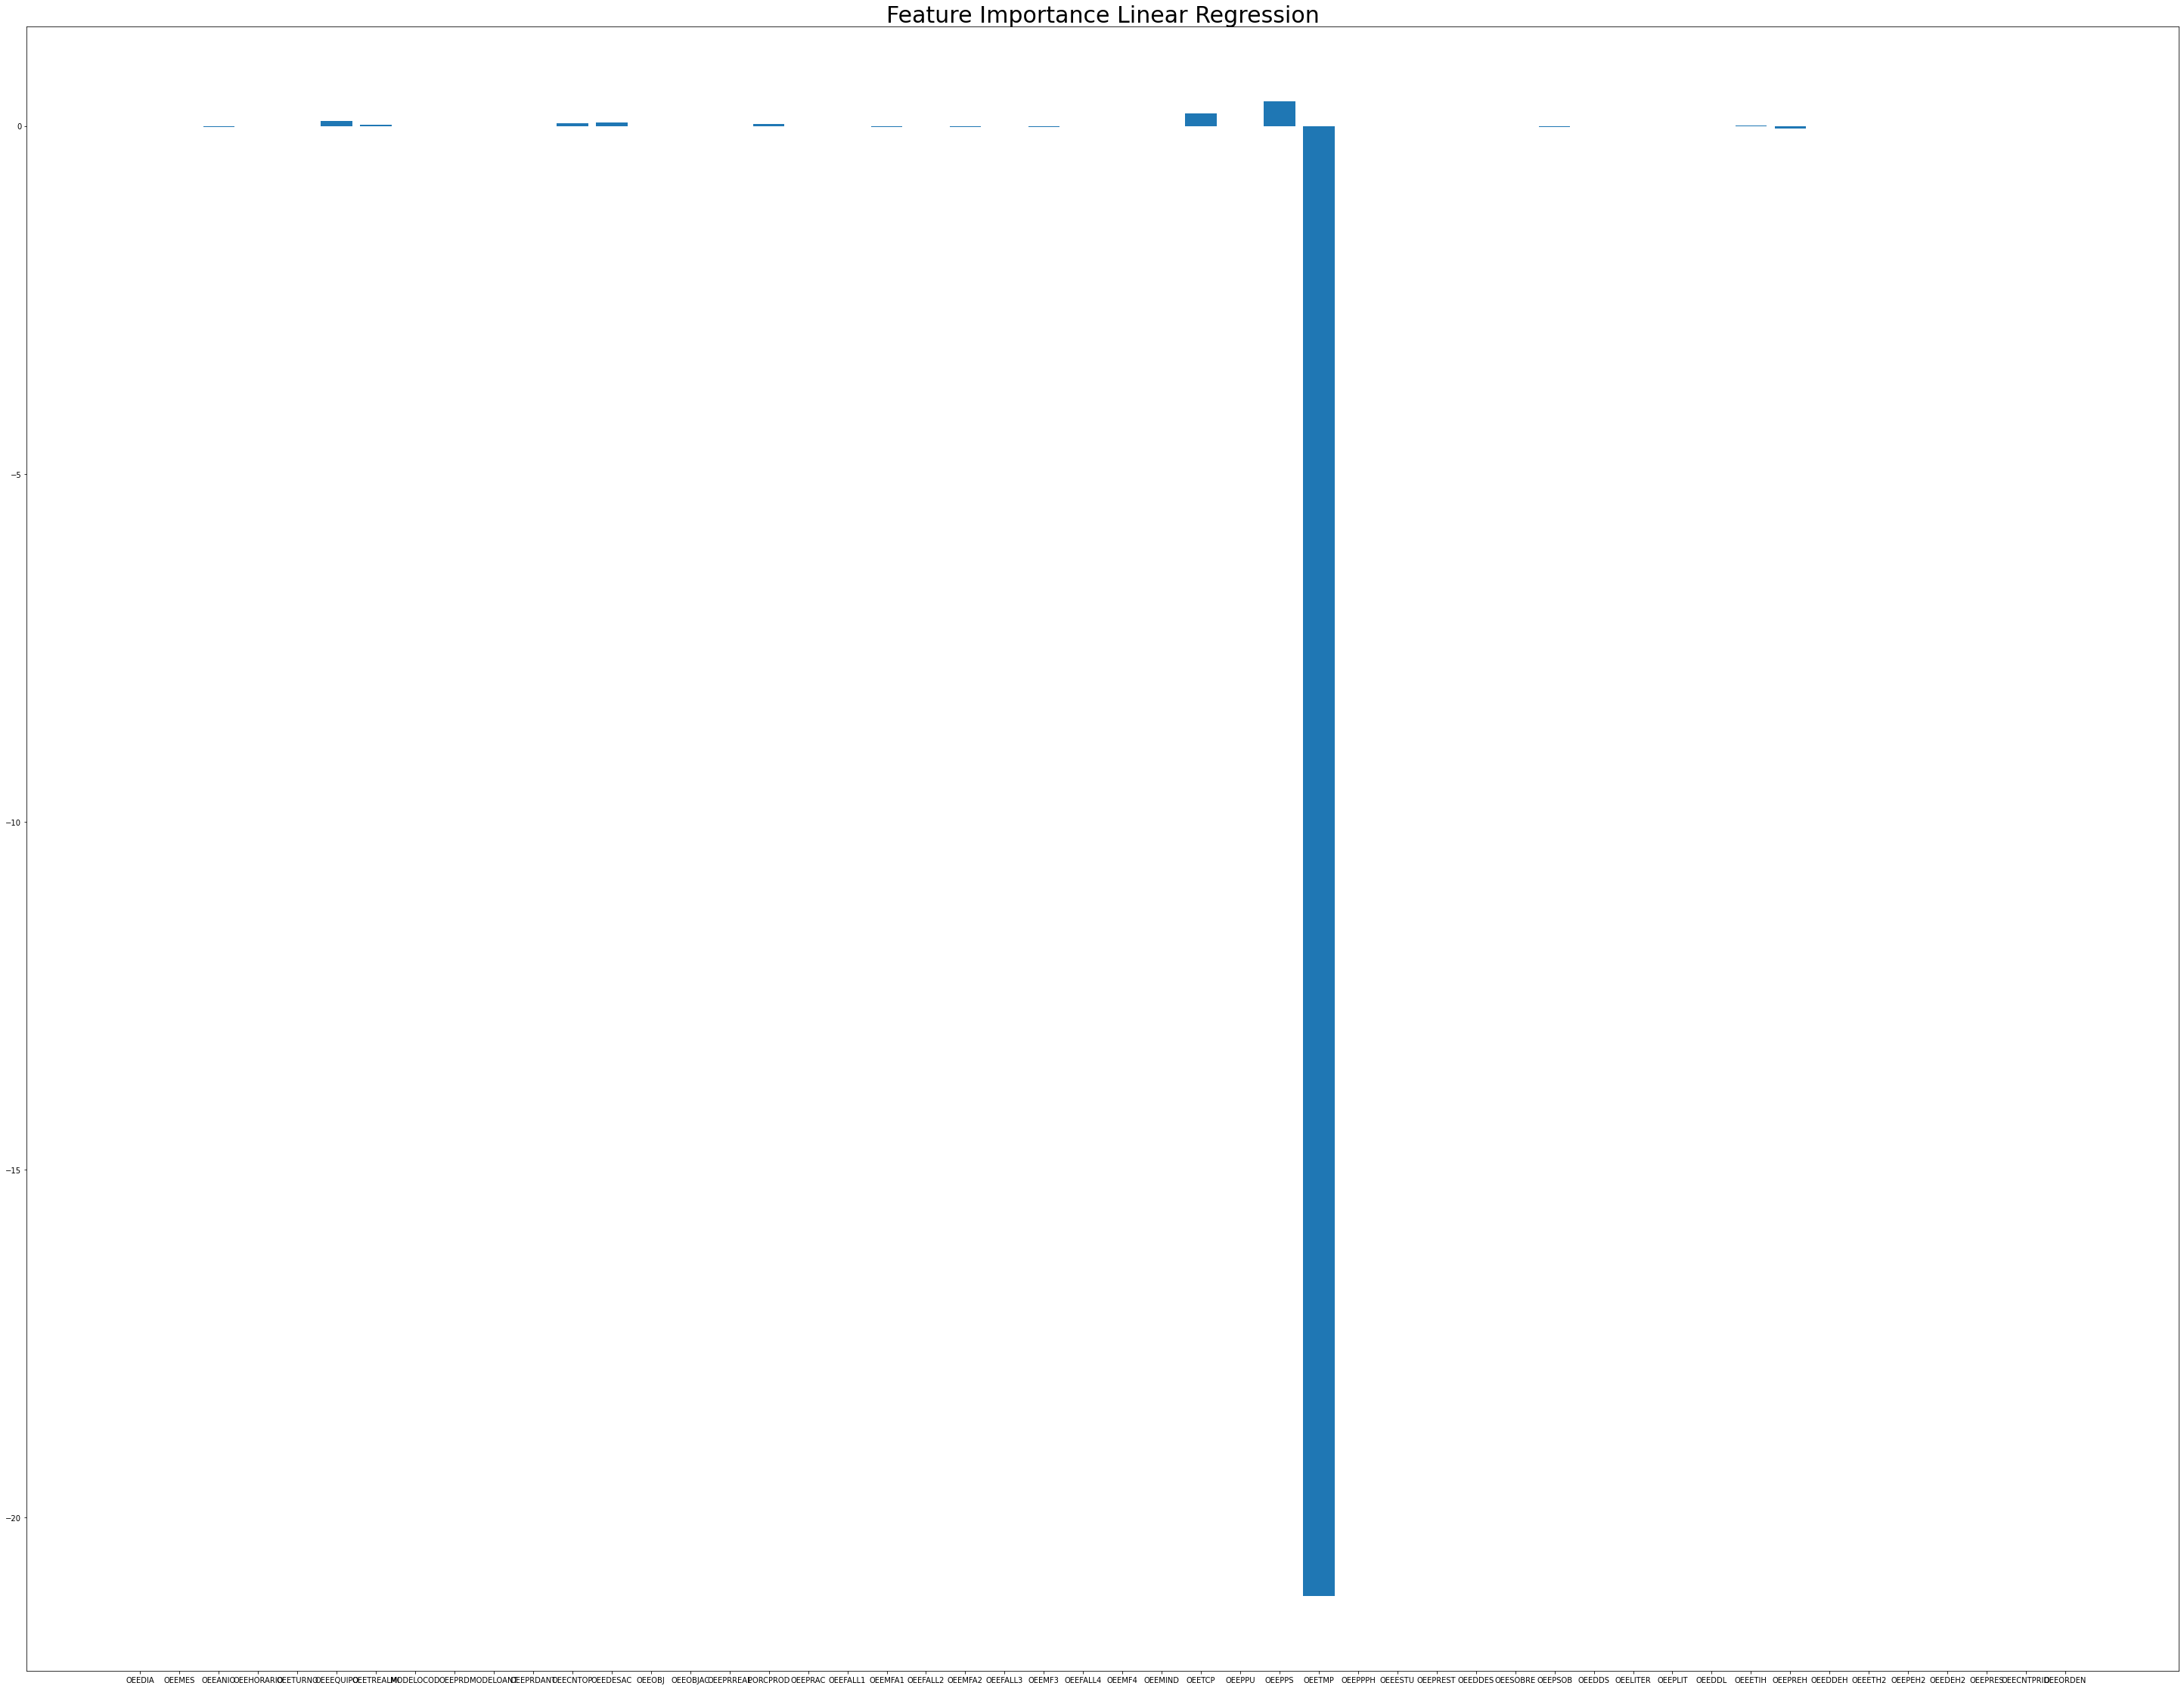

In [ ]:
# plot feature importance
pyplot.figure(figsize=(51,40))
pyplot.title('Feature Importance Linear Regression',size = 30)
pyplot.bar(feature_names, lr_importance)
pyplot.show()

In [ ]:
lr_importances = pd.Series(lr_importance,feature_names)

print(lr_importances.sort_values(ascending=False))

OEEPPS        3.516569e-01
OEETCP        1.755161e-01
OEEEQUIPO     7.447531e-02
OEEDESAC      4.613333e-02
OEECNTOP      3.583522e-02
PORCPROD      2.996024e-02
OEETREALMI    1.290065e-02
OEEETIH       7.211139e-03
OEETURNO      7.994473e-04
OEESOBRE      4.278240e-04
MODELOANT     1.036430e-04
OEEDDS        8.381375e-05
OEEPPPH       7.686583e-05
OEEDDL        6.190777e-05
OEEPPU        5.474454e-05
OEEORDEN      5.456373e-05
OEELITER      2.697522e-05
OEEPREST      1.172504e-05
OEEDEH2       1.119130e-05
OEEOBJ        4.196200e-06
OEEDDEH       3.611437e-06
OEEPRAC       2.770524e-07
OEEPRD        8.910101e-09
OEECNTPRID   -2.585245e-07
OEEPRDANT    -3.853051e-07
OEEOBJAC     -4.397922e-07
OEEPLIT      -2.429723e-06
OEEESTU      -1.017379e-05
MODELOCOD    -3.227364e-05
OEEPRREAL    -5.190382e-05
OEEDDES      -5.716718e-05
OEEHORARIO   -2.991618e-04
OEEETH2      -3.351322e-04
OEEDIA       -5.483683e-04
OEEFALL1     -8.155599e-04
OEEFALL2     -1.271933e-03
OEEPRES      -1.283502e-03
O

In [ ]:
print('Logistic Regression for Feature Importance')

# define the model
logr_model = LogisticRegression()
# fit the model
logr_model.fit(X_train, y_train)
# get importance
logr_importance = logr_model.coef_[0]
# summarize feature importance
for i,v in enumerate(logr_importance):
	print('Feature: %0d, Score: %.5f' % (i,v))


Logistic Regression for Feature Importance
Feature: 0, Score: -0.00000
Feature: 1, Score: -0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00000
Feature: 5, Score: -0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00003
Feature: 8, Score: 0.00001
Feature: 9, Score: 0.00003
Feature: 10, Score: -0.00001
Feature: 11, Score: 0.00000
Feature: 12, Score: -0.00000
Feature: 13, Score: -0.00529
Feature: 14, Score: -0.00001
Feature: 15, Score: 0.00654
Feature: 16, Score: 0.00001
Feature: 17, Score: 0.00001
Feature: 18, Score: -0.00001
Feature: 19, Score: -0.00003
Feature: 20, Score: -0.00003
Feature: 21, Score: -0.00001
Feature: 22, Score: -0.00004
Feature: 23, Score: -0.00001
Feature: 24, Score: -0.00004
Feature: 25, Score: -0.00000
Feature: 26, Score: -0.00006
Feature: 27, Score: 0.00000
Feature: 28, Score: -0.00167
Feature: 29, Score: -0.00044
Feature: 30, Score: -0.00001
Feature: 31, Score: 0.00127
Feature: 32, Score: -0.00005
Feature: 33, Score: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


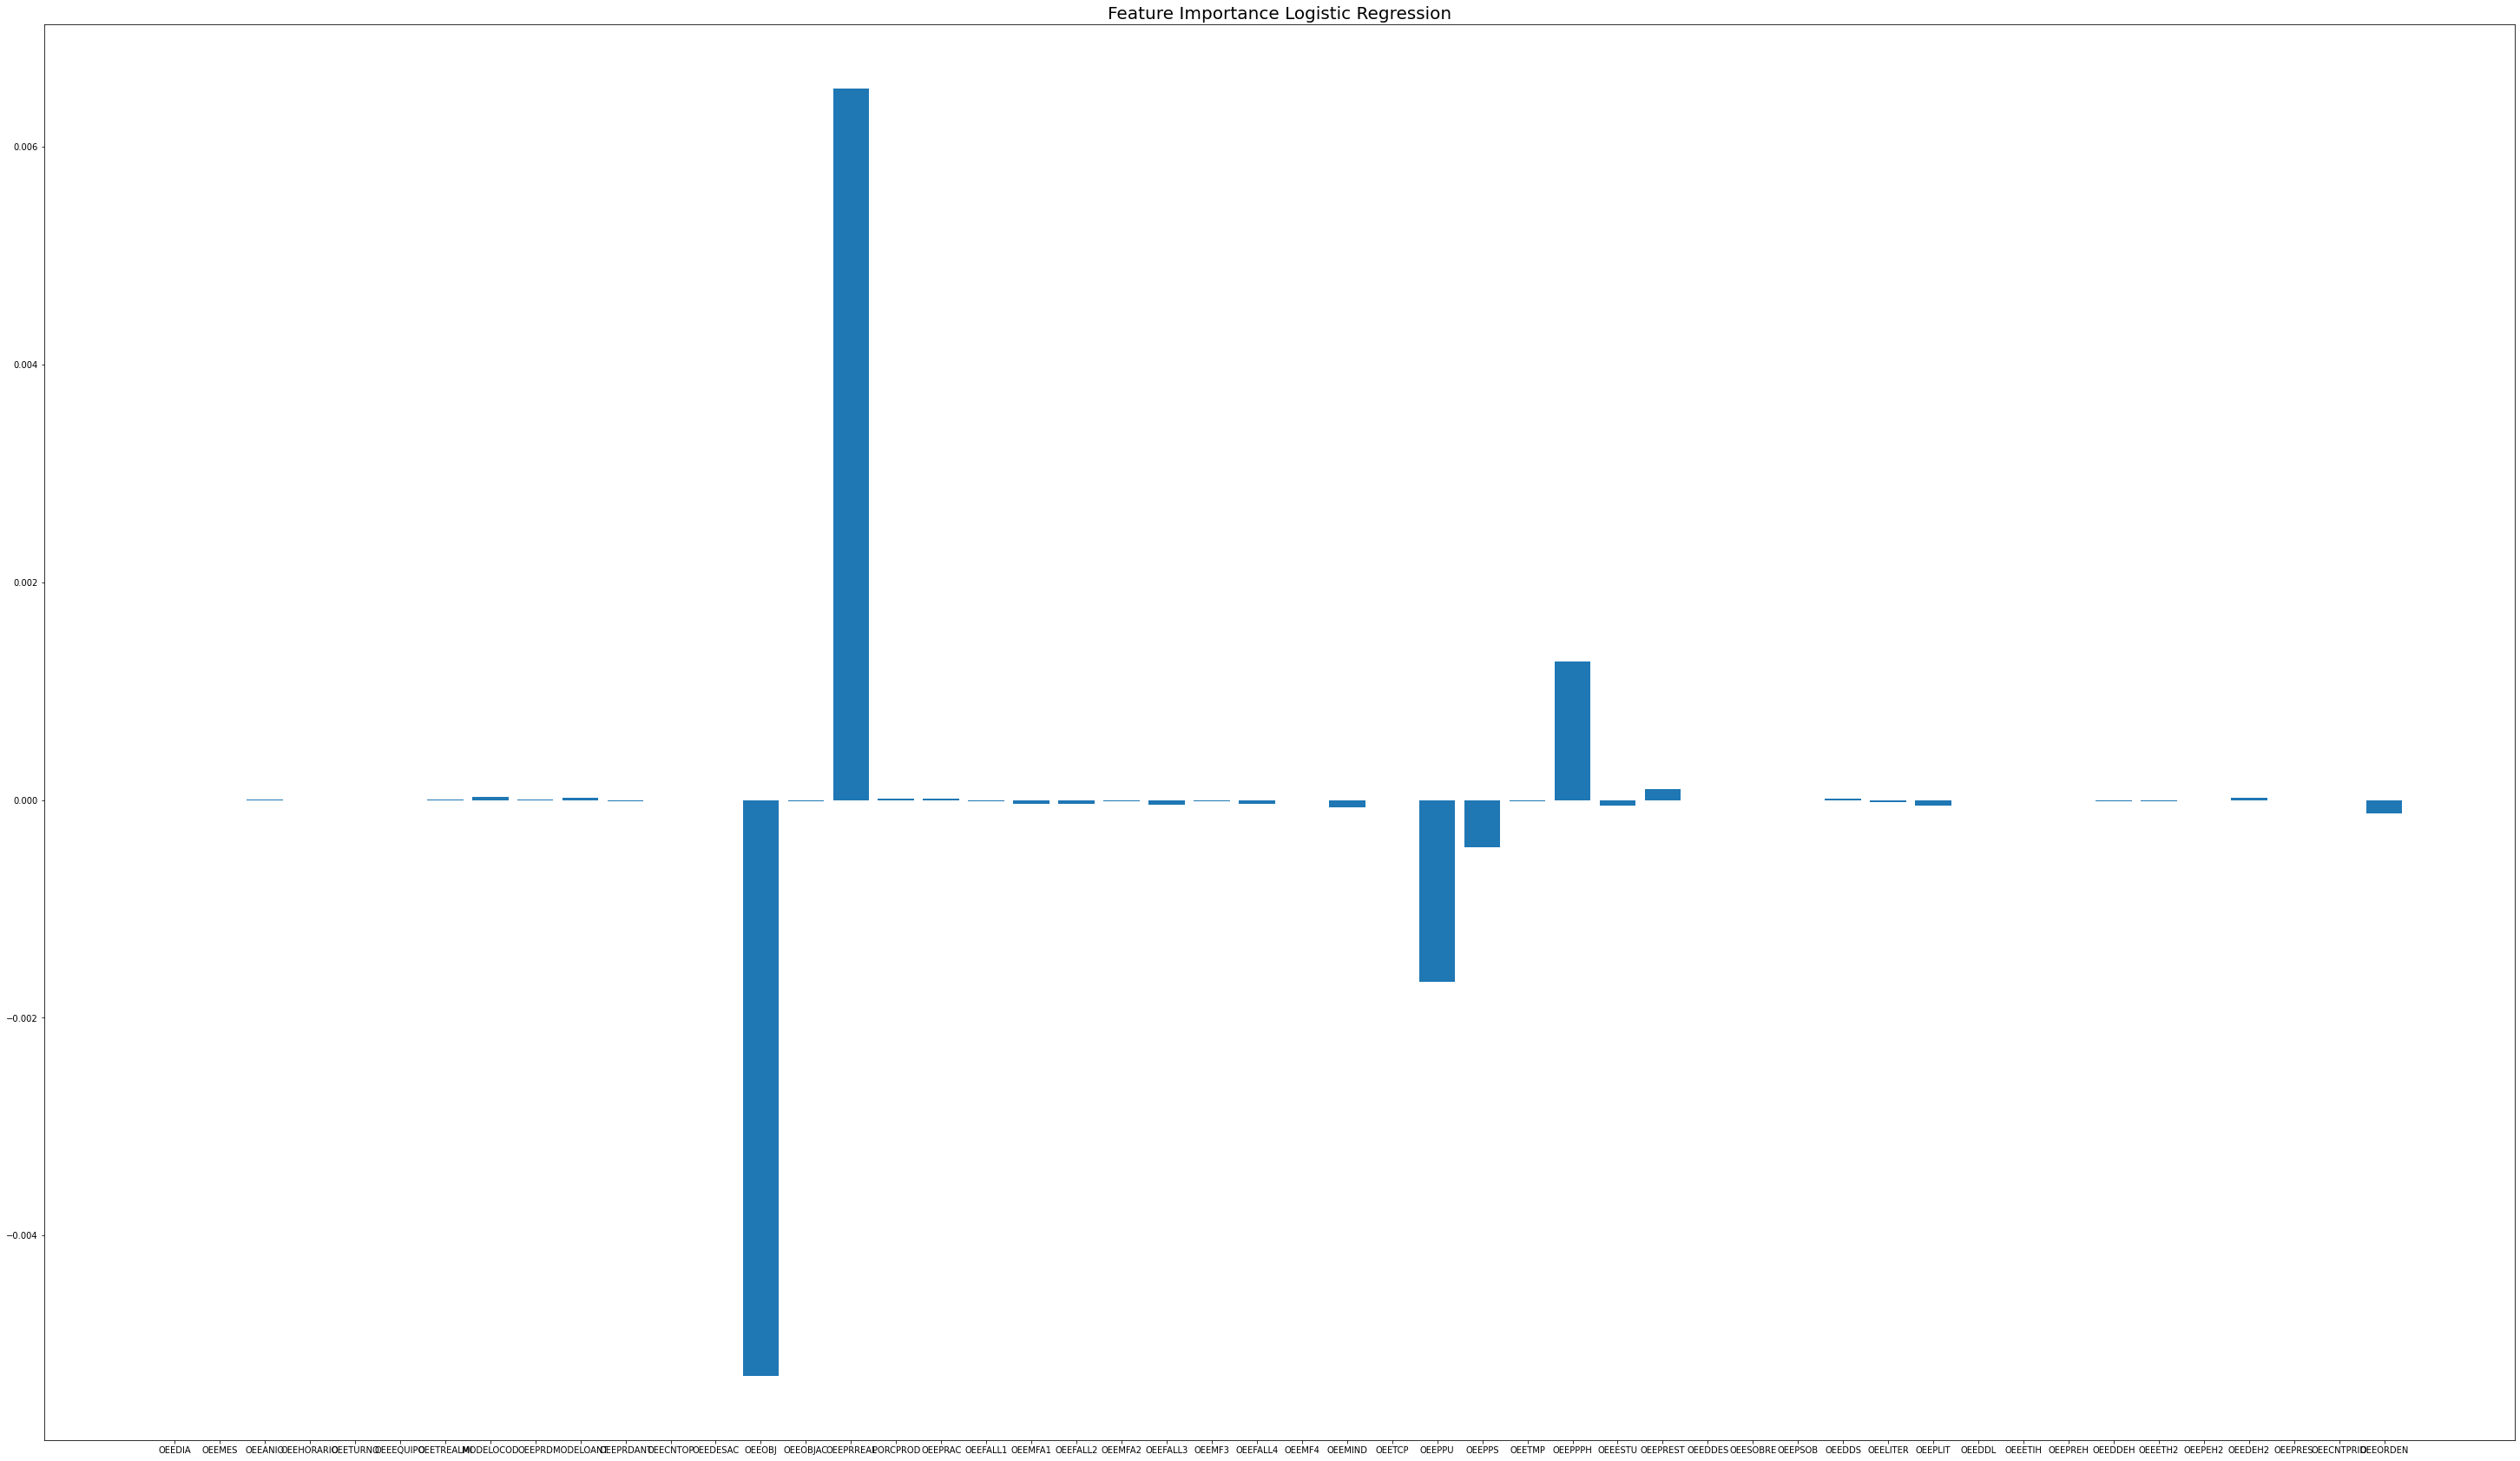

In [ ]:
# plot feature importance
pyplot.figure(figsize=(51,30))
pyplot.title('Feature Importance Logistic Regression',size=20)
pyplot.bar(feature_names, logr_importance)
pyplot.show()

In [ ]:
logr_importances = pd.Series(logr_importance,feature_names)

print(logr_importances.sort_values(ascending=False))

OEEPRREAL     6.535447e-03
OEEPPPH       1.271367e-03
OEEPREST      9.851704e-05
MODELOCOD     2.558476e-05
MODELOANT     2.510702e-05
OEEDEH2       2.119819e-05
PORCPROD      1.234641e-05
OEEPRAC       1.185208e-05
OEEDDS        1.008422e-05
OEEPRD        6.773164e-06
OEEANIO       2.689987e-06
OEETREALMI    2.197636e-06
OEEHORARIO    1.055216e-06
OEECNTOP      8.474901e-07
OEESOBRE      5.898366e-07
OEETCP        2.402595e-07
OEEPEH2       1.309087e-07
OEEPSOB       5.219115e-08
OEEDESAC     -3.014418e-09
OEETURNO     -1.369008e-07
OEEPREH      -2.048955e-07
OEEMES       -2.811565e-07
OEEPRES      -3.511524e-07
OEEETIH      -9.673853e-07
OEEEQUIPO    -1.186119e-06
OEECNTPRID   -1.307125e-06
OEEDDL       -1.548123e-06
OEEDIA       -1.575036e-06
OEEMF4       -3.988848e-06
OEEDDES      -5.037465e-06
OEEPRDANT    -6.962032e-06
OEEETH2      -7.206045e-06
OEETMP       -7.261698e-06
OEEFALL1     -7.720535e-06
OEEMF3       -8.362411e-06
OEEDDEH      -8.787918e-06
OEEOBJAC     -1.113192e-05
O

In [ ]:
print('Feature Importance XGBoost Classifier')

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predicted_y = xgb_model.predict(X_test)

print(metrics.classification_report(y_test, xgb_predicted_y))
print('Confusion Matrix')
print(metrics.confusion_matrix(y_test, xgb_predicted_y))

print('R2 Score ',metrics.r2_score(y_test, xgb_predicted_y))
print('mean_squared_log_error: ',metrics.mean_squared_log_error(y_test, xgb_predicted_y))

accuracy = accuracy_score(y_test, xgb_predicted_y)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

xgb_importance = xgb_model.feature_importances_
# summarize feature importance
for i,v in enumerate(xgb_importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

Feature Importance XGBoost Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5805
           1       1.00      1.00      1.00      1263

    accuracy                           1.00      7068
   macro avg       1.00      1.00      1.00      7068
weighted avg       1.00      1.00      1.00      7068

Confusion Matrix
[[5803    2]
 [   1 1262]]
R2 Score  0.997107907222253
mean_squared_log_error:  0.00020392742526239446
Accuracy: 99.96%
Feature: 0, Score: 0.00135
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00058
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00293
Feature: 6, Score: 0.00730
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00058
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00351
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.01374
Feature: 15, Score: 0.00396
Feature: 16, Score: 0.92879
Feature: 17, Score: 0.00173
Feat

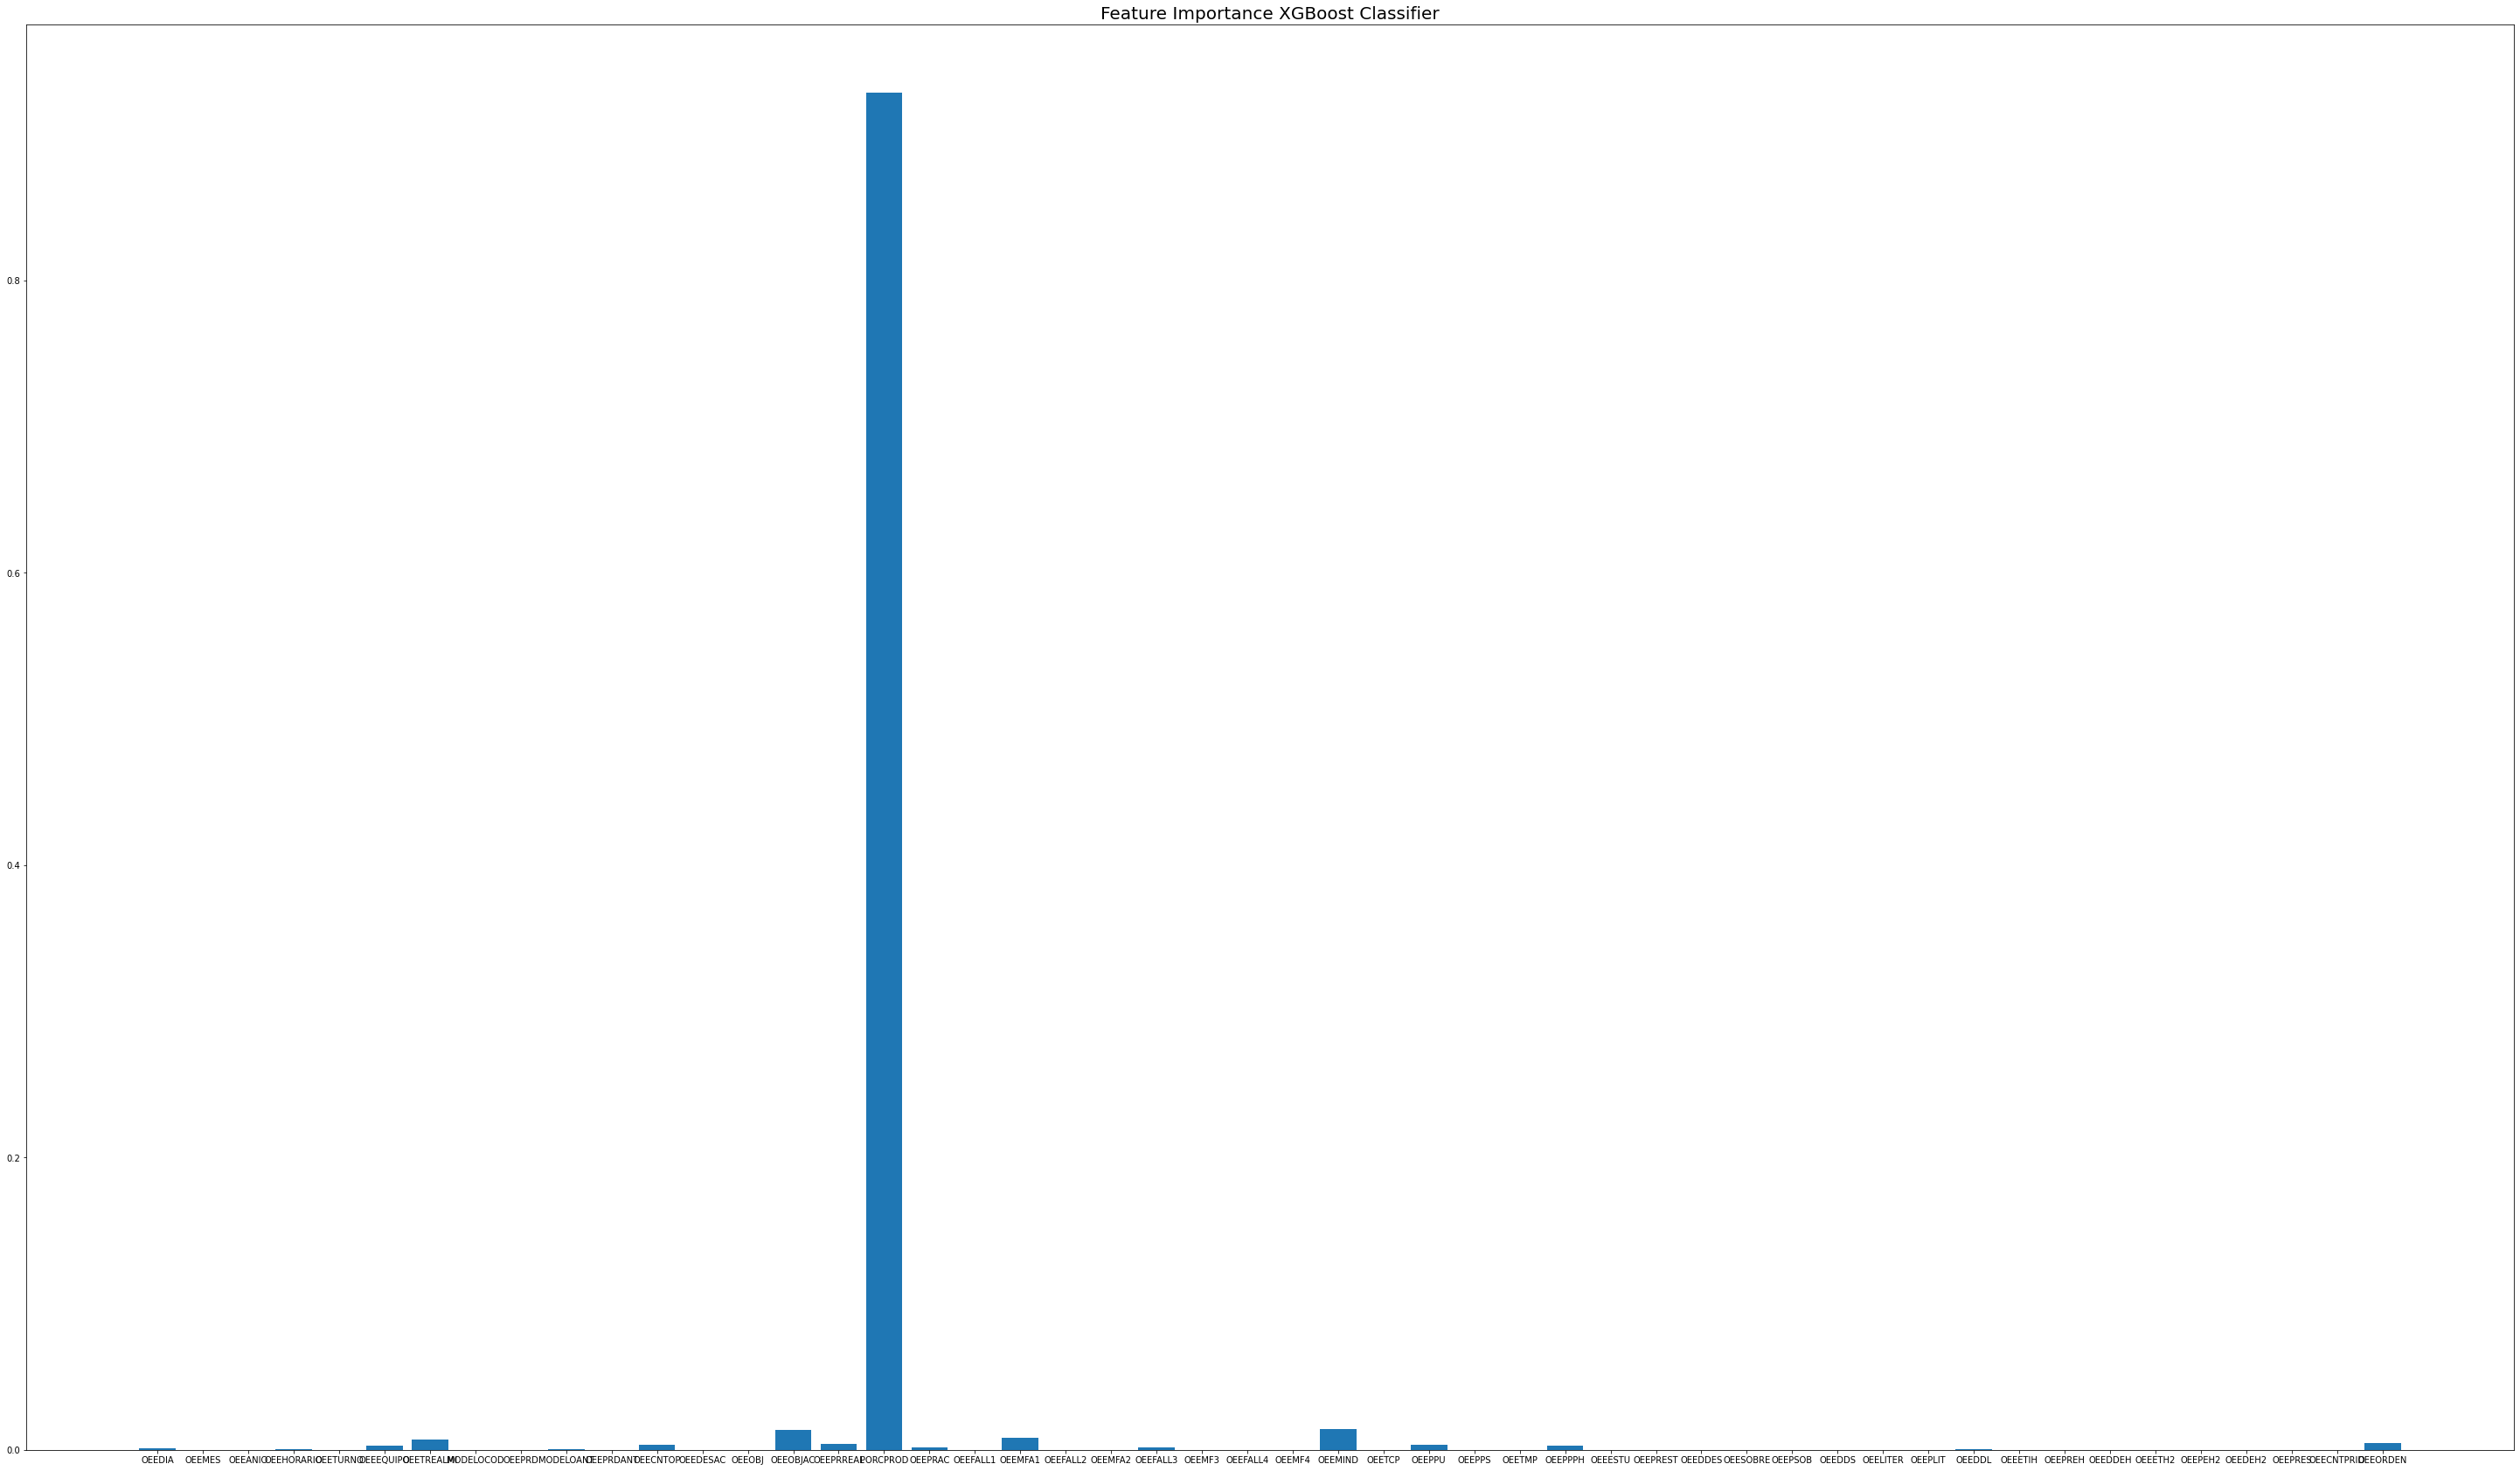

In [ ]:
# plot feature importance
pyplot.figure(figsize=(51,30))
pyplot.title('Feature Importance XGBoost Classifier',size=20)
pyplot.bar(feature_names, xgb_importance)
pyplot.show()

In [ ]:
xgb_importances = pd.Series(xgb_importance,feature_names)

print(xgb_importances.sort_values(ascending=False))

PORCPROD      0.928785
OEEMIND       0.014527
OEEOBJAC      0.013737
OEEMFA1       0.008005
OEETREALMI    0.007296
OEEORDEN      0.004821
OEEPRREAL     0.003961
OEECNTOP      0.003508
OEEPPU        0.003346
OEEEQUIPO     0.002928
OEEPPPH       0.002831
OEEPRAC       0.001730
OEEFALL3      0.001635
OEEDIA        0.001353
MODELOANT     0.000582
OEEHORARIO    0.000580
OEEDDL        0.000349
OEEPPS        0.000027
OEEOBJ        0.000000
OEEETIH       0.000000
OEEPSOB       0.000000
OEEDDS        0.000000
OEELITER      0.000000
OEEPLIT       0.000000
OEEPREH       0.000000
OEEDDES       0.000000
OEEDDEH       0.000000
OEEETH2       0.000000
OEEPEH2       0.000000
OEEDEH2       0.000000
OEEPRES       0.000000
OEECNTPRID    0.000000
OEESOBRE      0.000000
OEEESTU       0.000000
OEEPREST      0.000000
OEEDESAC      0.000000
OEEANIO       0.000000
OEETMP        0.000000
OEETCP        0.000000
OEETURNO      0.000000
OEEMES        0.000000
OEEFALL4      0.000000
OEEMF3        0.000000
MODELOCOD  

In [ ]:
print('XGBoost Random Forest Classifier Feature Importance')

# define the model
XGBRFC_model = XGBRFClassifier(n_estimators=100, subsample=0.9, colsample_bynode=0.2)
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(XGBRFC_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy: ')
print(n_scores.mean())
print(n_scores.std())

XGBRFC_model.fit(X_train, y_train)

# make a prediction
XGBRFC_y_pred = XGBRFC_model.predict(X_test)

print('R2 Score ',metrics.r2_score(y_test, XGBRFC_y_pred))
print('mean_squared_log_error: ',metrics.mean_squared_log_error(y_test, XGBRFC_y_pred))

accuracy = accuracy_score(y_test, XGBRFC_y_pred)
print("Random Forest Accuracy: %.2f%%" % (accuracy * 100.0))

XGBRFC_importance = XGBRFC_model.feature_importances_
# summarize feature importance
for i,v in enumerate(XGBRFC_importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

XGBoost Random Forest Classifier Feature Importance
Mean Accuracy: 
0.9970265349395874
0.0011651128908497595
R2 Score  0.9758992268521076
mean_squared_log_error:  0.0016993952105199537
Random Forest Accuracy: 99.65%
Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00821
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.03000
Feature: 6, Score: 0.02640
Feature: 7, Score: 0.00002
Feature: 8, Score: 0.00035
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00029
Feature: 11, Score: 0.03447
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.03509
Feature: 14, Score: 0.00897
Feature: 15, Score: 0.07101
Feature: 16, Score: 0.22288
Feature: 17, Score: 0.02367
Feature: 18, Score: 0.00462
Feature: 19, Score: 0.07083
Feature: 20, Score: 0.00021
Feature: 21, Score: 0.03606
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.02992
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.01501
Feature: 26, Score: 0.19071
Feature: 27, Score: 0.02622
Feature: 2

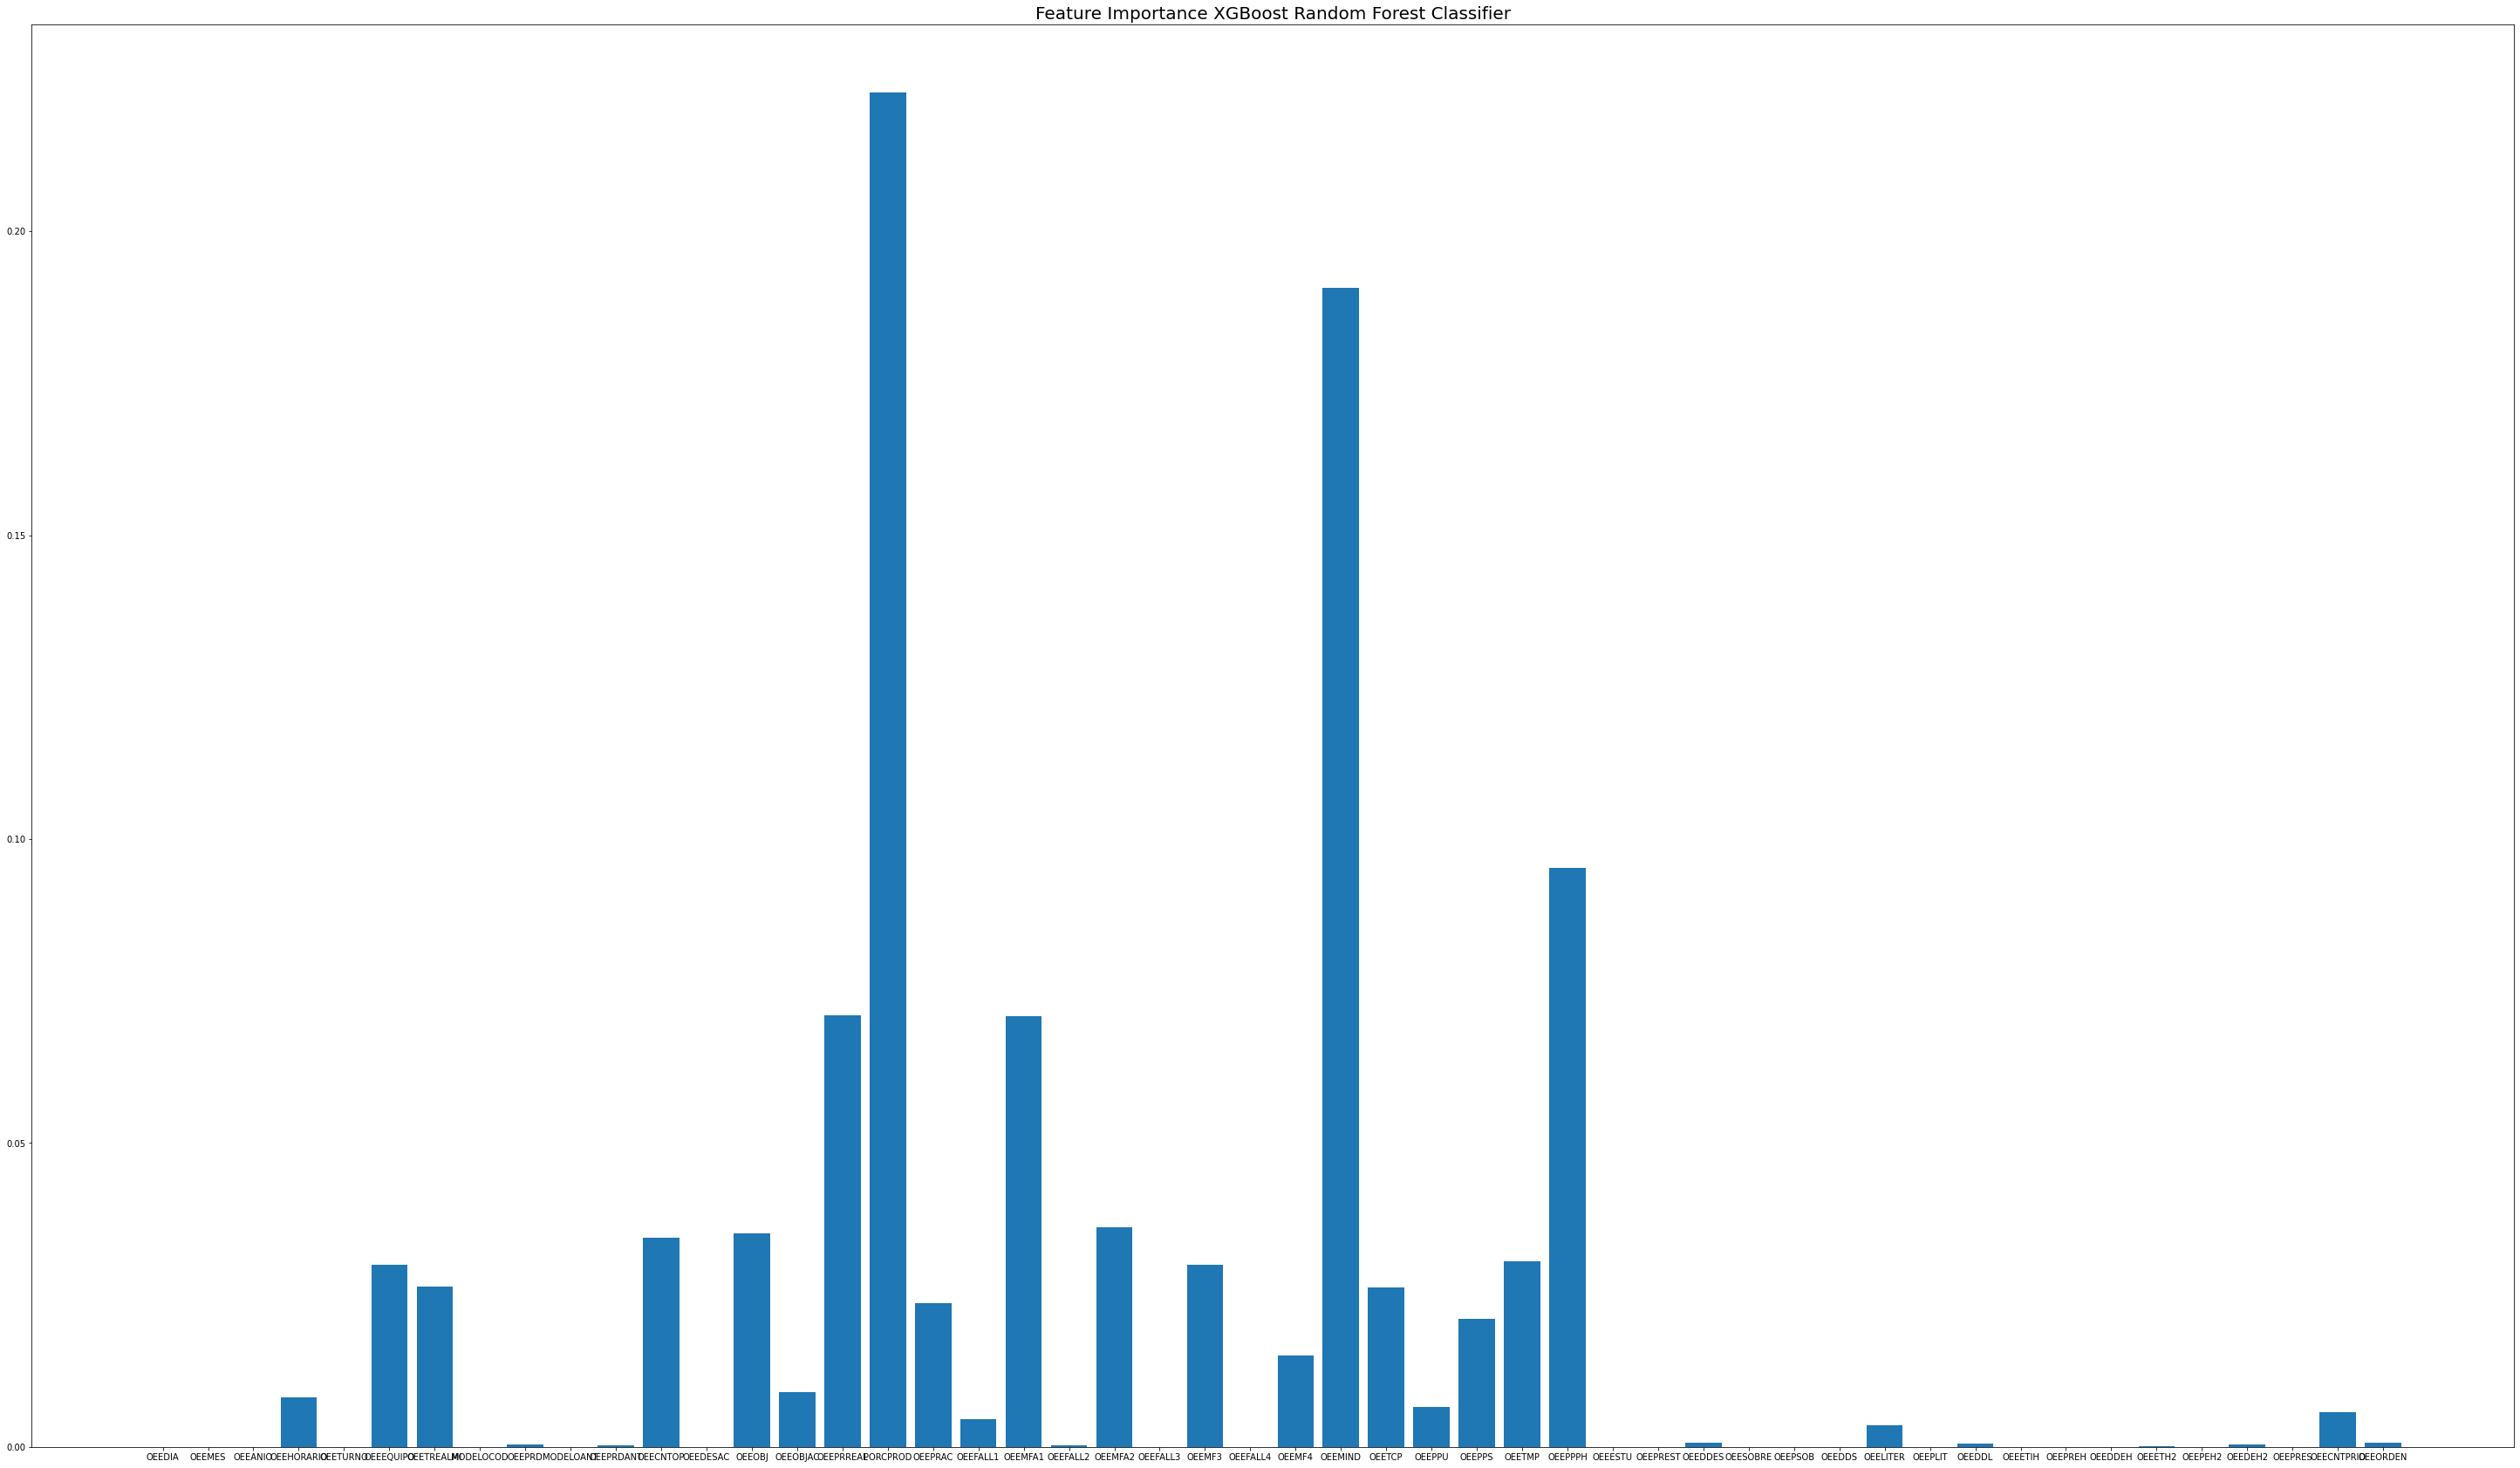

In [ ]:
# plot feature importance
pyplot.figure(figsize=(51,30))
pyplot.title('Feature Importance XGBoost Random Forest Classifier',size=20)
pyplot.bar(feature_names, XGBRFC_importance)
pyplot.show()

In [ ]:
XGBRFC_importances = pd.Series(XGBRFC_importance,feature_names)

print(XGBRFC_importances.sort_values(ascending=False))

PORCPROD      0.222878
OEEMIND       0.190710
OEEPPPH       0.095206
OEEPRREAL     0.071011
OEEMFA1       0.070829
OEEMFA2       0.036063
OEEOBJ        0.035092
OEECNTOP      0.034472
OEETMP        0.030504
OEEEQUIPO     0.029999
OEEMF3        0.029917
OEETREALMI    0.026401
OEETCP        0.026223
OEEPRAC       0.023667
OEEPPS        0.021034
OEEMF4        0.015009
OEEOBJAC      0.008969
OEEHORARIO    0.008209
OEEPPU        0.006641
OEECNTPRID    0.005769
OEEFALL1      0.004616
OEELITER      0.003610
OEEORDEN      0.000680
OEEDDES       0.000626
OEEDDL        0.000588
OEEPRD        0.000355
OEEDEH2       0.000345
OEEPRDANT     0.000288
OEEFALL2      0.000210
OEEETH2       0.000063
MODELOCOD     0.000016
OEEFALL3      0.000000
OEEPLIT       0.000000
OEEANIO       0.000000
OEEPRES       0.000000
OEEPEH2       0.000000
OEEDDEH       0.000000
OEEPREH       0.000000
OEEETIH       0.000000
OEEPSOB       0.000000
OEETURNO      0.000000
OEEDDS        0.000000
OEEFALL4      0.000000
OEESOBRE   

XGBoost Random Forest Hyperparameters
>10 0.997 (0.001)
>50 0.997 (0.001)
>100 0.997 (0.001)
>500 0.997 (0.001)
>1000 0.997 (0.001)
>5000 0.997 (0.001)


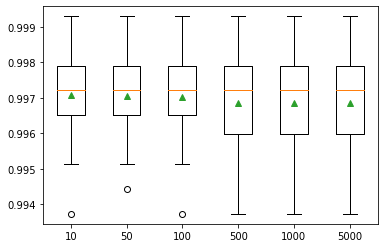

In [ ]:
print('XGBoost Random Forest Hyperparameters')

# get a list of models to evaluate
def get_models():
	models = dict()
	# define the number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for v in n_trees:
		models[str(v)] = XGBRFClassifier(n_estimators=v, subsample=0.9, colsample_bynode=0.2)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	# define the model evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model and collect the results
	scores = evaluate_model(model, X_train, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize performance along the way
	print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std() ))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

PCA


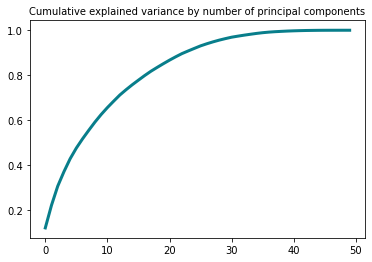

In [ ]:
print('PCA')

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

pca = PCA(n_components = 50).fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=10)
plt.show()

In [ ]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(feature_names) + 1)],
    index=feature_names
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
OEEDIA,0.022939,0.004465,0.018335,-0.011281,0.014406,-0.009062,-0.006623,0.044140,0.001135,0.010829,...,-0.000088,0.000134,0.000100,0.000637,-0.000082,0.000247,-0.000082,0.000556,0.000054,2.039442e-13
OEEMES,-0.011101,-0.032485,-0.016186,0.015374,0.077783,-0.139454,-0.024426,0.025168,0.138261,-0.039837,...,-0.000376,-0.000023,0.001363,0.001675,-0.000244,-0.000410,-0.000488,0.006312,0.000422,2.066378e-12
OEEANIO,0.455272,0.263097,0.150319,0.004501,0.457864,0.116761,-0.120855,-0.481266,-0.116720,-0.138973,...,0.001125,0.000331,0.004583,0.005256,-0.000197,-0.001479,-0.003084,0.038937,0.002729,-7.896214e-12
OEEHORARIO,0.389038,-0.009397,0.005563,0.015978,0.206532,-0.320357,-0.388861,-0.219600,0.513599,-0.023415,...,0.049989,-0.006161,0.097797,-0.003548,0.001232,-0.000702,0.000977,-0.000207,-0.000600,-4.486645e-12
OEETURNO,0.347503,0.117541,0.055301,0.025575,0.186006,-0.204321,-0.293251,-0.295618,0.328172,-0.037894,...,-0.036580,0.004682,-0.070009,0.003300,-0.000783,0.000320,-0.000820,0.000482,0.000440,1.519306e-12


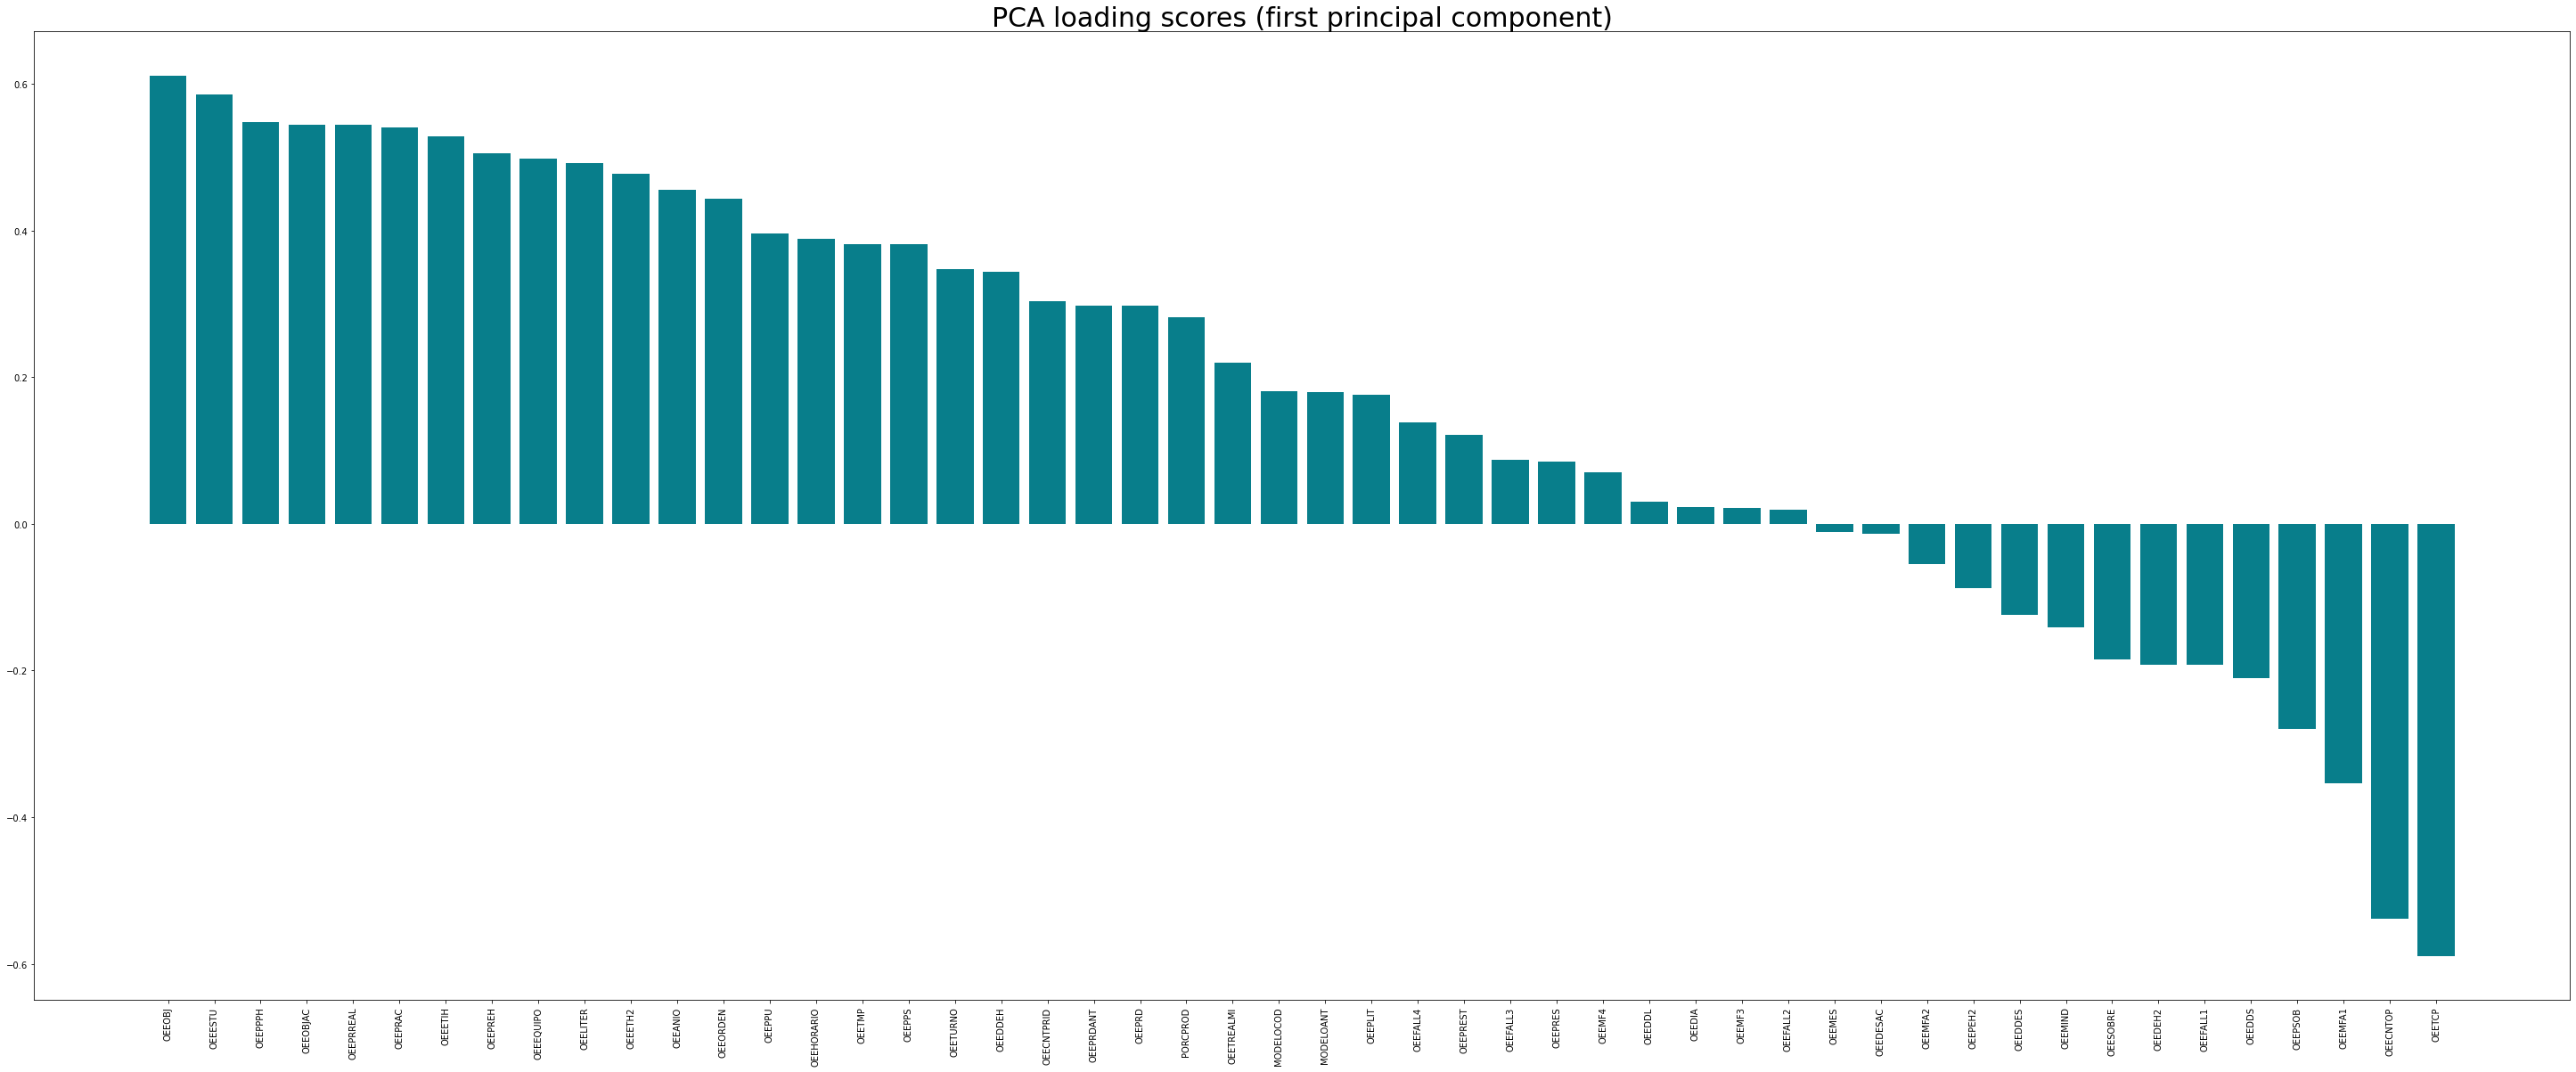

In [ ]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.figure(figsize=(51,20))
plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=30)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
pc1_loadings

,Attribute,CorrelationWithPC1
0,OEEOBJ,0.611265
1,OEEESTU,0.584848
2,OEEPPPH,0.547162
3,OEEOBJAC,0.543746
4,OEEPRREAL,0.543492
5,OEEPRAC,0.540552
6,OEEETIH,0.527820
7,OEEPREH,0.505521
8,OEEEQUIPO,0.497914
9,OEELITER,0.491976


Truncated Singular Value Decomposition (SVD)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


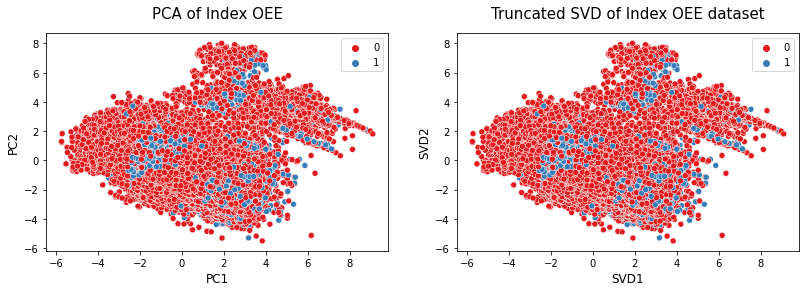

In [ ]:
print('Truncated Singular Value Decomposition (SVD)')

stdsc = StandardScaler()
X_STD_scaled = stdsc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_STD_scaled)

svd = TruncatedSVD(n_components=2, algorithm='randomized',
                   random_state=0)
X_svd = svd.fit_transform(X_STD_scaled)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_svd[:,0], X_svd[:,1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA of Index OEE", fontsize=15, pad=15)
ax[1].set_title("Truncated SVD of Index OEE dataset", fontsize=15, pad=15)
ax[0].set_xlabel("PC1", fontsize=12)
ax[0].set_ylabel("PC2", fontsize=12)
ax[1].set_xlabel("SVD1", fontsize=12)
ax[1].set_ylabel("SVD2", fontsize=12)
plt.savefig('PCA vs SVD.png', dpi=100)

Kernel PCA


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Component 2')

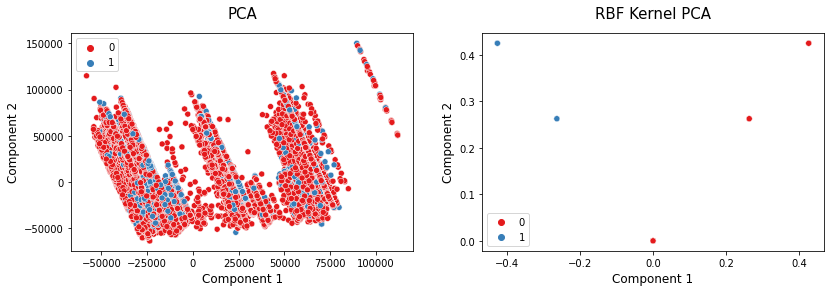

In [ ]:
print('Kernel PCA')
from sklearn.decomposition import KernelPCA

pca_kernel = PCA(n_components=2)
X_pca_kernel = pca_kernel.fit_transform(X)

kpca = KernelPCA(n_components=2, kernel='rbf',
                 gamma=15, random_state=42)
X_kpca_kernel = kpca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(X_pca_kernel[:, 0], X_pca_kernel[:, 1], hue=y, palette='Set1', ax=ax[0])
sns.scatterplot(X_kpca_kernel[:, 0], X_kpca_kernel[:, 1], hue=y, palette='Set1', ax=ax[1])
ax[0].set_title("PCA", fontsize=15, pad=15)
ax[1].set_title("RBF Kernel PCA", fontsize=15, pad=15)
ax[0].set_xlabel("Component 1", fontsize=12)
ax[0].set_ylabel("Component 2", fontsize=12)
ax[1].set_xlabel("Component 1", fontsize=12)
ax[1].set_ylabel("Component 2", fontsize=12)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled_tsne = sc.fit_transform(X)
pca_tsne = PCA()
X_pca_tsne = pca_tsne.fit_transform(X_scaled_tsne)
tsne = TSNE()
X_tsne = tsne.fit_transform(X_pca_tsne)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 't-SNE of Index OEE dataset')

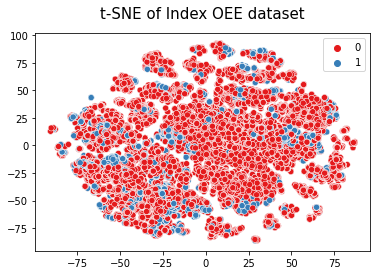

In [ ]:
sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y, palette='Set1')
plt.title("t-SNE of Index OEE dataset", fontsize=15, pad=15)

In [ ]:
feature_names

Index(['OEEDIA', 'OEEMES', 'OEEANIO', 'OEEHORARIO', 'OEETURNO', 'OEEEQUIPO',
       'OEETREALMI', 'MODELOCOD', 'OEEPRD', 'MODELOANT', 'OEEPRDANT',
       'OEECNTOP', 'OEEDESAC', 'OEEOBJ', 'OEEOBJAC', 'OEEPRREAL', 'PORCPROD',
       'OEEPRAC', 'OEEFALL1', 'OEEMFA1', 'OEEFALL2', 'OEEMFA2', 'OEEFALL3',
       'OEEMF3', 'OEEFALL4', 'OEEMF4', 'OEEMIND', 'OEETCP', 'OEEPPU', 'OEEPPS',
       'OEETMP', 'OEEPPPH', 'OEEESTU', 'OEEPREST', 'OEEDDES', 'OEESOBRE',
       'OEEPSOB', 'OEEDDS', 'OEELITER', 'OEEPLIT', 'OEEDDL', 'OEEETIH',
       'OEEPREH', 'OEEDDEH', 'OEEETH2', 'OEEPEH2', 'OEEDEH2', 'OEEPRES',
       'OEECNTPRID', 'OEEORDEN'],
      dtype='object')

In [ ]:
print("SPLIT DATA")
new_X_red = np.array(df.drop( ['OEEDIA', 'OEEMES', 'OEEANIO', 'OEEHORARIO', 'OEETURNO', 'OEEPRDANT', 'OEEOBJ', 'OEEOBJAC','OEEPRAC','OEEFALL1',
                               'OEEFALL2','OEEFALL3','OEEFALL4','OEEESTU', 'OEEPREST', 'OEEDDES', 'OEESOBRE','OEEPSOB', 'OEEDDS', 'OEELITER',
                               'OEEPLIT', 'OEEDDL', 'OEEETIH','OEEDDEH','OEEETH2', 'OEEPEH2', 'OEEDEH2','OEEPRES','VALOEE'], 1 ))
new_y_red = np.array(df['VALOEE'])

#Preparo test y train
new_train_size = int(len(df) * 0.67)
new_test_size = len(df) - new_train_size

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X_red, new_y_red, test_size=new_test_size, random_state=42)

print('New Train: ',new_X_train.shape[0],' New Test: ',new_X_test.shape[0])

SPLIT DATA
New Train:  14349  New Test:  7068


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
new_X_train.shape

(14349, 22)

In [ ]:
print('LinearRegression')
#Armo el modelo y lo entreno
new_model_lr = linear_model.LinearRegression()
new_model_lr.fit(new_X_train, new_y_train)

print('Precisión del Nuevo modelo Reducido en TRAIN:')
print(new_model_lr.score(new_X_train, new_y_train))

##Realizo la predicción y calculo precisión
new_Y_pred_multiple_lr = new_model_lr.predict(new_X_test)

print('Precisión del Nuevo modelo Reducido en TEST:')
print(new_model_lr.score(new_X_test, new_y_test))

print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(new_model_lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(new_model_lr.intercept_)


LinearRegression
Precisión del Nuevo modelo Reducido en TRAIN:
0.4727158072174794
Precisión del Nuevo modelo Reducido en TEST:
0.47838577311516106
DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[-3.52499210e-02  1.09236756e-02  1.74778013e-05 -5.18982046e-07
  1.21588904e-04  1.09427700e-02  8.51416274e-03 -4.61754783e-05
  3.72292672e-02 -1.50391010e-02 -1.75513985e-02 -1.99649434e-02
 -2.10319387e-02  3.77583855e-03 -3.44633073e-01  6.58536267e-05
  3.84007466e-01 -2.30748591e+01  6.06318386e-05 -8.45018148e-03
 -2.96109932e-07 -2.57102847e-06]
Valor de la intersección o coeficiente "b":
1.252534341275608


In [ ]:
print('Stats Models')
#Analizo los datos con StatsModels
stm_model_red = sm.OLS(new_y_train,new_X_train).fit()
stm_predictions_red = stm_model_red.predict(new_X_test)

print_stm_model_red = stm_model_red.summary()
print(print_stm_model_red)

Stats Models
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.563
Model:                            OLS   Adj. R-squared (uncentered):              0.562
Method:                 Least Squares   F-statistic:                              838.9
Date:                Tue, 09 Aug 2022   Prob (F-statistic):                        0.00
Time:                        16:22:50   Log-Likelihood:                         -1827.3
No. Observations:               14349   AIC:                                      3699.
Df Residuals:                   14327   BIC:                                      3865.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [ ]:
print('Logistic Regression')
#Armo el modelo y lo entreno
new_model_lgr = linear_model.LogisticRegression()
new_model_lgr.fit(new_X_train, new_y_train)

print('Precisión del Nuevo modelo Reducido en TRAIN:')
print(new_model_lgr.score(new_X_train, new_y_train))

##Realizo la predicción y calculo precisión
new_Y_pred_multiple_lr = new_model_lgr.predict(new_X_test)

print('Precisión del Nuevo modelo Reducido en TEST:')
print(new_model_lgr.score(new_X_test, new_y_test))

print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(new_model_lgr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(new_model_lgr.intercept_)

Logistic Regression
Precisión del Nuevo modelo Reducido en TRAIN:
0.8374799637605408
Precisión del Nuevo modelo Reducido en TEST:
0.8293718166383701
DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[[-7.59317893e-07 -3.21642520e-06  2.02680166e-05 -1.32669288e-06
   2.01831381e-05  5.78968774e-07 -3.34903703e-09  3.13617706e-04
   3.74696809e-06 -9.72084495e-06 -4.26034105e-06 -2.80786810e-06
  -1.38299267e-06 -2.22294331e-05  1.61428925e-07 -9.89276439e-04
  -2.44108131e-04 -4.06850150e-06  8.82490072e-05 -7.11645633e-08
   1.77752059e-06 -9.09084411e-05]]
Valor de la intersección o coeficiente "b":
[-9.35749746e-10]
